In [39]:
import dlib
import cv2
import numpy as np
import os
import tensorflow as tf
import imageio
from imutils import face_utils
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import Image, display
import glob


In [40]:
import zipfile
import os
import shutil
from pathlib import Path

def unzip_file(zip_path, extract_to=None, show_progress=True):
    """
    Extract a ZIP file to a specified directory

    Args:
        zip_path (str): Path to the ZIP file
        extract_to (str): Directory to extract to (default: same folder as ZIP)
        show_progress (bool): Show extraction progress
    """
    # Convert to Path objects for easier handling
    zip_path = Path("/home/diya871/code/G-Gress/lip_reading/lip_reading/shape_predictor_68_face_landmarks.dat.bz2")

    # Check if ZIP file exists
    if not zip_path.exists():
        print(f"❌ ZIP file not found: {zip_path}")
        return False

In [41]:
#  Set your video and alignment directories
video_dir = "raw_data/videos/s1.mpg_vcd/s1"  # <-- Set to directory, not file
alignment_dir = "/home/diya871/code/G-Gress/lip_reading/raw_data/alignments /s1/align/bbaf2n.align"
output_dir = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips"
os.makedirs(output_dir, exist_ok=True)


#  Lip landmark indices from dlib's 68-point face model
LIP_INDEXES = list(range(48, 68))

def extract_lip_region(frame, landmarks):
    """Crop the lip region based on 68-point landmarks"""
    lip_points = landmarks[LIP_INDEXES]
    x, y, w, h = cv2.boundingRect(np.array(lip_points))
    margin = 10  # Add padding around lips
    x = max(x - margin, 0)
    y = max(y - margin, 0)
    return frame[y:y+h+margin, x:x+w+margin]


# List all .mpg files in the video_dir
video_files = glob.glob(os.path.join(video_dir, "*.mpg"))

print(f"Processing {len(video_files)} video files...")

for video_file in tqdm(video_files):
    video_path = video_file  # video_files already contains full paths
    cap = cv2.VideoCapture(video_path)

    frame_num = 0
    success = True
    while success:
        success, frame = cap.read()
        if not success:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        if len(faces) > 0:
            shape = predictor(gray, faces[0])
            shape = face_utils.shape_to_np(shape)

            lip = extract_lip_region(frame, shape)

            #  Save the cropped lip image
            lip_filename = f"{video_file[:-4]}_frame{frame_num}.png"
            lip_path = os.path.join(output_dir, lip_filename)
            cv2.imwrite(lip_path, lip)

        frame_num += 1

    cap.release()

print("✅ Lip extraction complete.")


Processing 0 video files...


0it [00:00, ?it/s]

✅ Lip extraction complete.


In [42]:
# List all .mpg files in the given directory
mpg_files = glob.glob("/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1/*.mpg")
print("Found .mpg files:", mpg_files)


Found .mpg files: ['/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1/lriy1s.mpg', '/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1/pbbp3s.mpg', '/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1/lwir5a.mpg', '/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1/sriuzp.mpg', '/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1/pbiu8n.mpg', '/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1/lbwl1a.mpg', '/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1/bbil4p.mpg', '/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1/lwar7s.mpg', '/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1/bgig6n.mpg', '/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1/bram4p.mpg', '/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1/bgan7a.mpg', '/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s

In [43]:
# Get input shape (height, width, channels) of the first video file
first_video = ("/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1/bbaf2n.mpg")
video_path = first_video  # Use the absolute path directly
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
if ret:
    print("Input shape:", frame.shape)  # (height, width, channels)
else:
    print("Failed to read video.")
cap.release()

Input shape: (288, 360, 3)


In [49]:
import dlib
import cv2
import numpy as np
from imutils import face_utils
import os

# Paths
video_path = "/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1/bbaf2n.mpg"  # Change as needed
predictor_path = "/home/diya871/code/G-Gress/lip_reading/lip_reading/shape_predictor_68_face_landmarks.dat/shape_predictor_68_face_landmarks.dat"
output_dir = "/home/diya871/code/G-Gress/lip_reading/lip_reading/test_lip_output"
os.makedirs(output_dir, exist_ok=True)

import bz2
# Load dlib models
detector = dlib.get_frontal_face_detector()

if not os.path.isfile(predictor_path):
    # Try to decompress from .bz2 if available
    if os.path.isfile(bz2_path):
        print(f"Decompressing {bz2_path} to {predictor_path} ...")
        with bz2.open(bz2_path, 'rb') as f_in, open(predictor_path, 'wb') as f_out:
            f_out.write(f_in.read())
        print("Decompression complete.")
    else:
        raise FileNotFoundError(f"Predictor file not found: {predictor_path} and .bz2 not found: {bz2_path}")

predictor = dlib.shape_predictor(predictor_path)

# Lip landmark indices
LIP_INDEXES = list(range(48, 68))

def extract_lip_region(frame, landmarks):
    lip_points = landmarks[LIP_INDEXES]
    x, y, w, h = cv2.boundingRect(np.array(lip_points))
    margin = 10
    x = max(x - margin, 0)
    y = max(y - margin, 0)
    return frame[y:y+h+margin, x:x+w+margin]

cap = cv2.VideoCapture(video_path)
frame_num = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    if len(faces) > 0:
        shape = predictor(gray, faces[0])
        shape = face_utils.shape_to_np(shape)
        lip = extract_lip_region(frame, shape)
        # Save the cropped lip image
        lip_filename = f"frame{frame_num}_lip.png"
        lip_path = os.path.join(output_dir, lip_filename)
        cv2.imwrite(lip_path, lip)
    frame_num += 1
cap.release()
print("✅ Lip extraction complete for one video.")

✅ Lip extraction complete for one video.


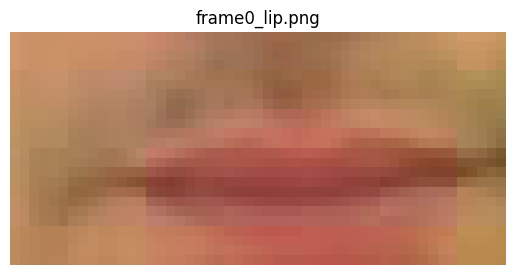

In [50]:
import matplotlib.pyplot as plt
import cv2
import os

# Show the first extracted lip image
lip_images = sorted([f for f in os.listdir(output_dir) if f.endswith('.png')])
if lip_images:
    img_path = os.path.join(output_dir, lip_images[0])
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(lip_images[0])
    plt.axis('off')
    plt.show()
else:
    print("No lip images found in output directory.")

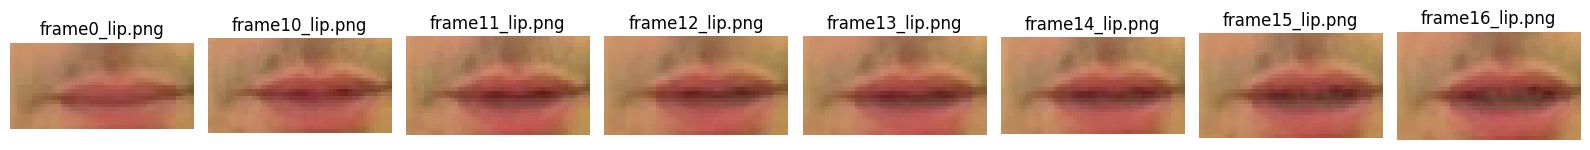

In [51]:
import matplotlib.pyplot as plt
import cv2
import os

# Show the first 8 extracted lip images in a grid
lip_images = sorted([f for f in os.listdir(output_dir) if f.endswith('.png')])
num_to_show = min(8, len(lip_images))

if num_to_show > 0:
    plt.figure(figsize=(16, 4))
    for i in range(num_to_show):
        img_path = os.path.join(output_dir, lip_images[i])
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_to_show, i+1)
        plt.imshow(img_rgb)
        plt.title(lip_images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No lip images found in output directory.")

In [53]:
import dlib
import cv2
import numpy as np
from imutils import face_utils
import os
import glob

# Paths
video_dir = "/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1"
predictor_path = "/home/diya871/code/G-Gress/lip_reading/lip_reading/shape_predictor_68_face_landmarks.dat"
output_dir = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips"
os.makedirs(output_dir, exist_ok=True)

# Load dlib models
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/home/diya871/code/G-Gress/lip_reading/lip_reading/shape_predictor_68_face_landmarks.dat/shape_predictor_68_face_landmarks.dat")

# Lip landmark indices
LIP_INDEXES = list(range(48, 68))

def extract_lip_region(frame, landmarks):
    lip_points = landmarks[LIP_INDEXES]
    x, y, w, h = cv2.boundingRect(np.array(lip_points))
    margin = 10
    x = max(x - margin, 0)
    y = max(y - margin, 0)
    return frame[y:y+h+margin, x:x+w+margin]

# Get first 10 video files
video_files = sorted(glob.glob(os.path.join(video_dir, "*.mpg")))[:10]

for video_file in video_files:
    video_name = os.path.splitext(os.path.basename(video_file))[0]
    video_output_dir = os.path.join(output_dir, video_name)
    os.makedirs(video_output_dir, exist_ok=True)
    cap = cv2.VideoCapture(video_file)
    frame_num = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)
        if len(faces) > 0:
            shape = predictor(gray, faces[0])
            shape = face_utils.shape_to_np(shape)
            lip = extract_lip_region(frame, shape)
            lip_filename = f"frame{frame_num}_lip.png"
            lip_path = os.path.join(video_output_dir, lip_filename)
            cv2.imwrite(lip_path, lip)
        frame_num += 1
    cap.release()
    print(f"✅ Lip extraction complete for {video_name}")

✅ Lip extraction complete for bbaf2n
✅ Lip extraction complete for bbaf3s
✅ Lip extraction complete for bbaf4p
✅ Lip extraction complete for bbaf5a
✅ Lip extraction complete for bbal6n
✅ Lip extraction complete for bbal7s
✅ Lip extraction complete for bbal8p
✅ Lip extraction complete for bbal9a
✅ Lip extraction complete for bbas1s
✅ Lip extraction complete for bbas2p


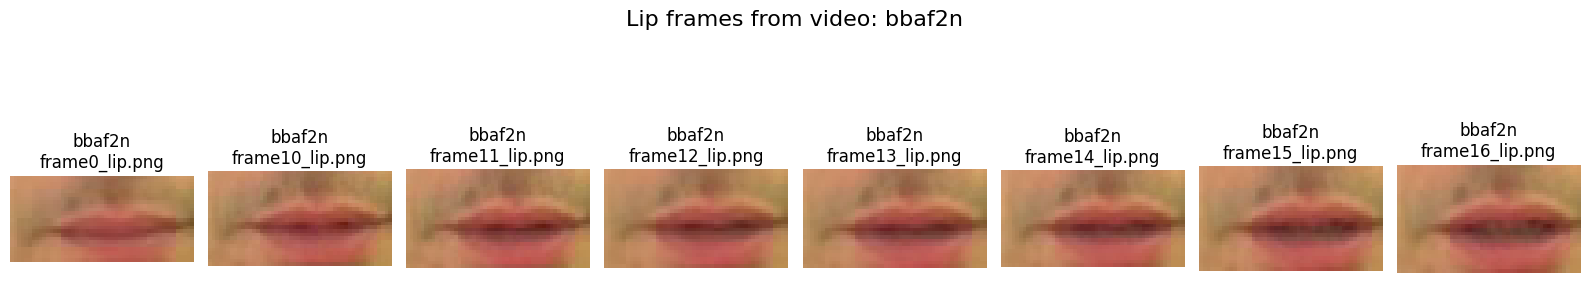

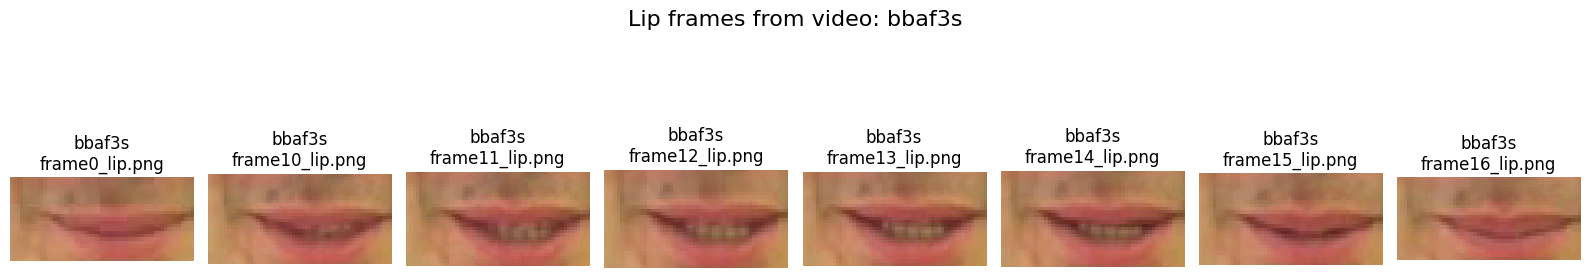

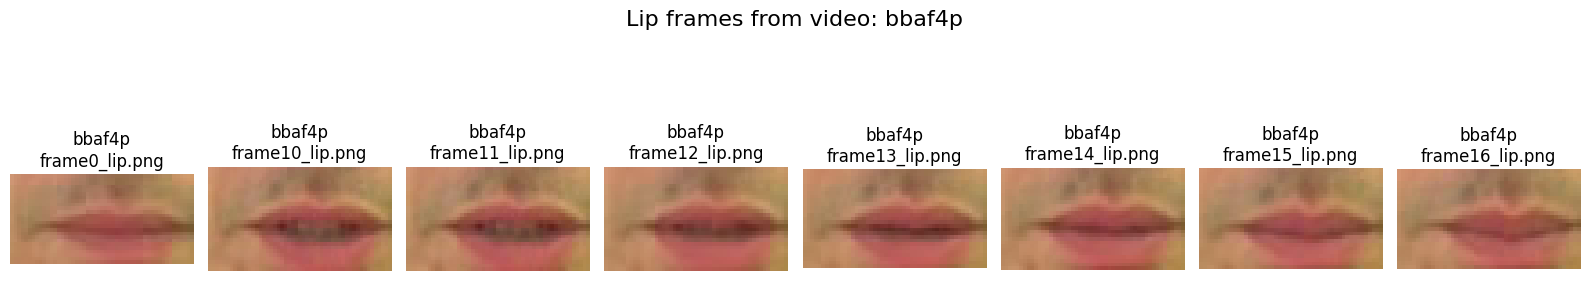

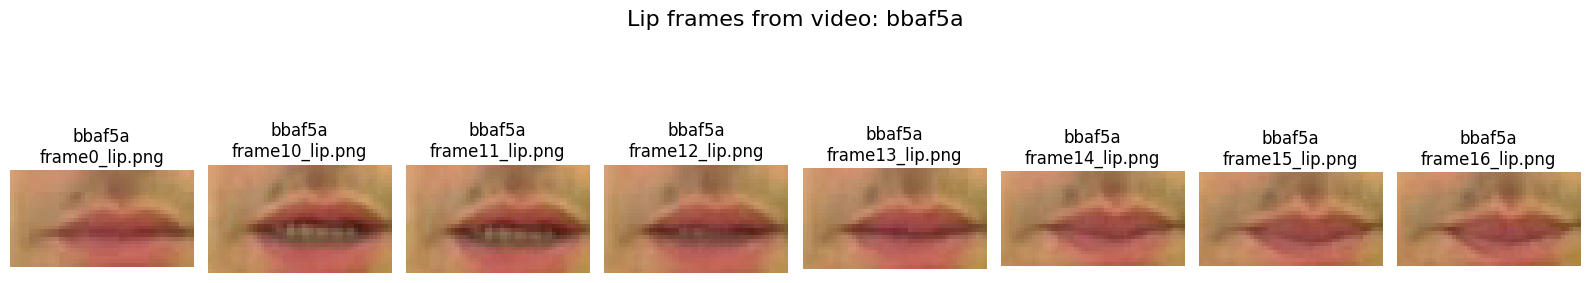

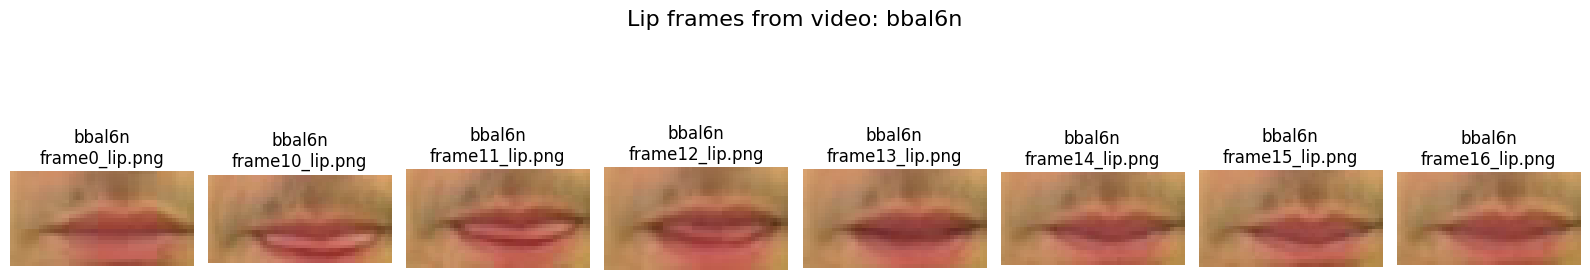

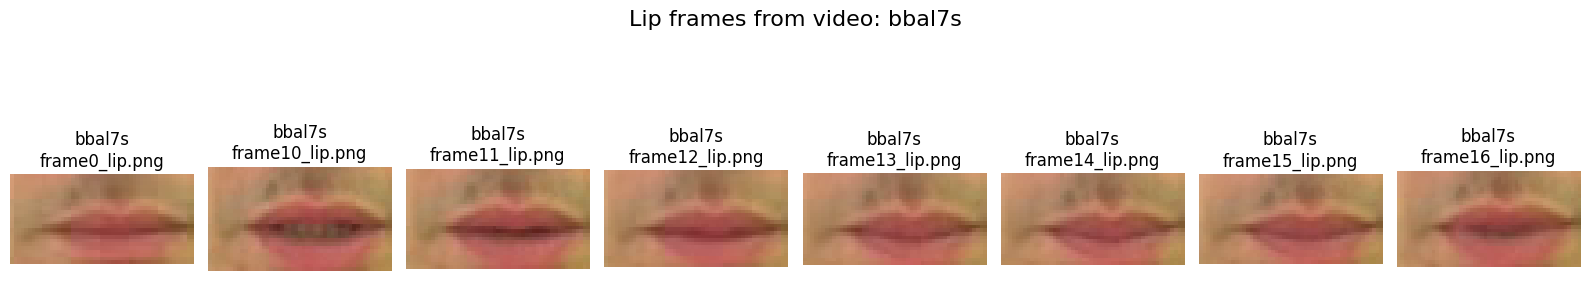

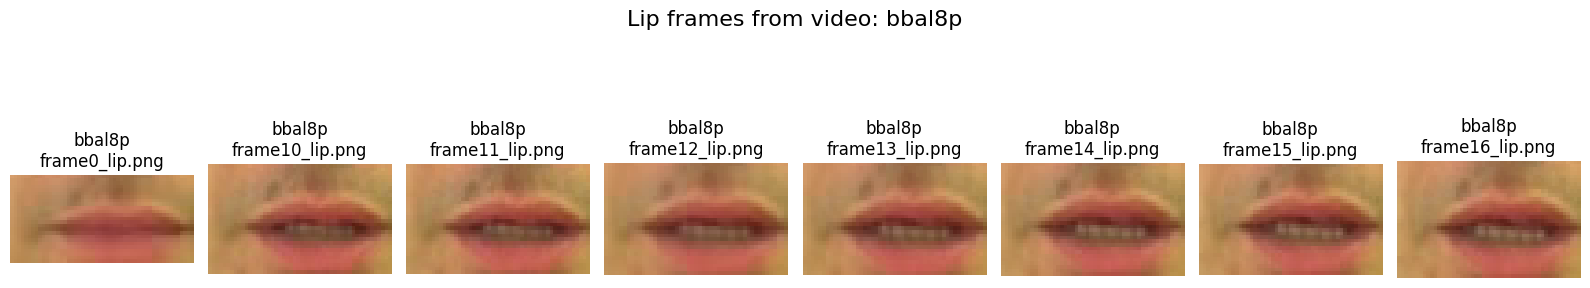

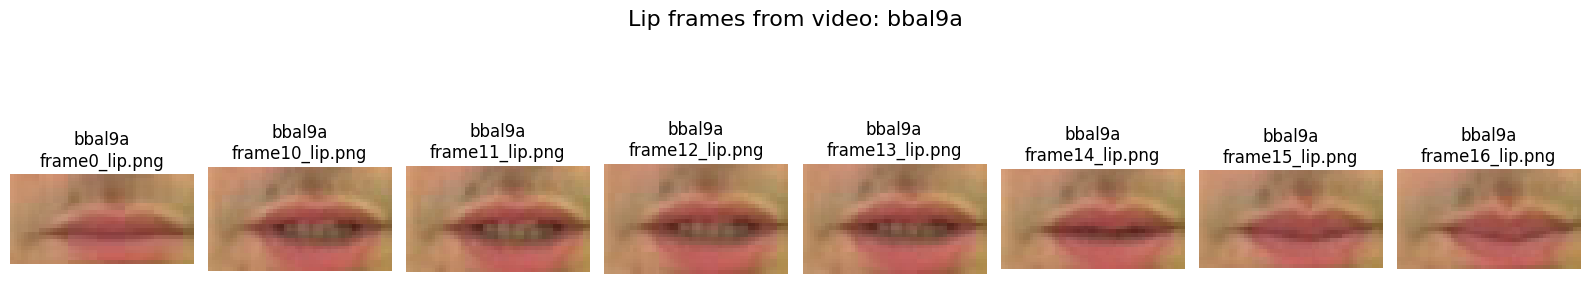

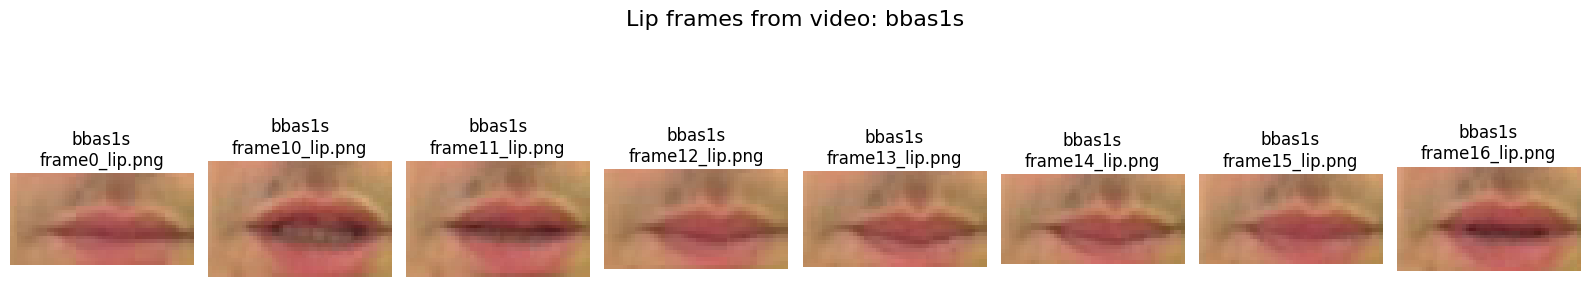

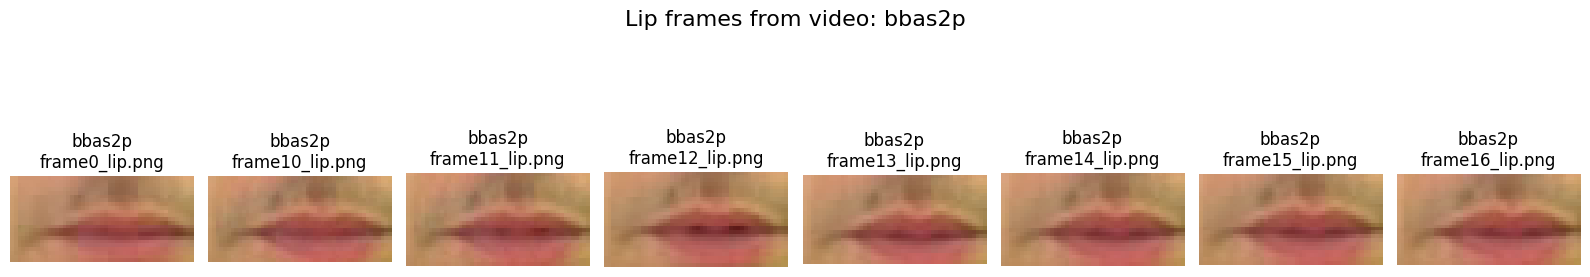

In [54]:
import matplotlib.pyplot as plt
import cv2
import os

# Path to the processed_lips directory
base_output_dir = output_dir  # already set to processed_lips

# List all video subfolders (first 10 videos)
video_folders = sorted([f for f in os.listdir(base_output_dir) if os.path.isdir(os.path.join(base_output_dir, f))])[:10]

for video_folder in video_folders:
    folder_path = os.path.join(base_output_dir, video_folder)
    lip_images = sorted([f for f in os.listdir(folder_path) if f.endswith('.png')])
    num_to_show = min(8, len(lip_images))
    if num_to_show == 0:
        continue
    plt.figure(figsize=(16, 4))
    for i in range(num_to_show):
        img_path = os.path.join(folder_path, lip_images[i])
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_to_show, i+1)
        plt.imshow(img_rgb)
        plt.title(f"{video_folder}\n{lip_images[i]}")
        plt.axis('off')
    plt.suptitle(f"Lip frames from video: {video_folder}", fontsize=16)
    plt.tight_layout()
    plt.show()

In [57]:
import cv2
import os

# Example: check the shape of the first lip image from the first video folder
base_output_dir = output_dir  # already set to processed_lips
video_folders = sorted([f for f in os.listdir(base_output_dir) if os.path.isdir(os.path.join(base_output_dir, f))])

if video_folders:
    folder_path = os.path.join(base_output_dir, video_folders[0])
    lip_images = sorted([f for f in os.listdir(folder_path) if f.endswith('.png')])
    if lip_images:
        img_path = os.path.join(folder_path, lip_images[0])
        img = cv2.imread(img_path)
        print("Input size (height, width, channels):", img.shape)
    else:
        print("No lip images found in the first video folder.")
else:
    print("No video folders found in output directory.")

Input size (height, width, channels): (24, 51, 3)


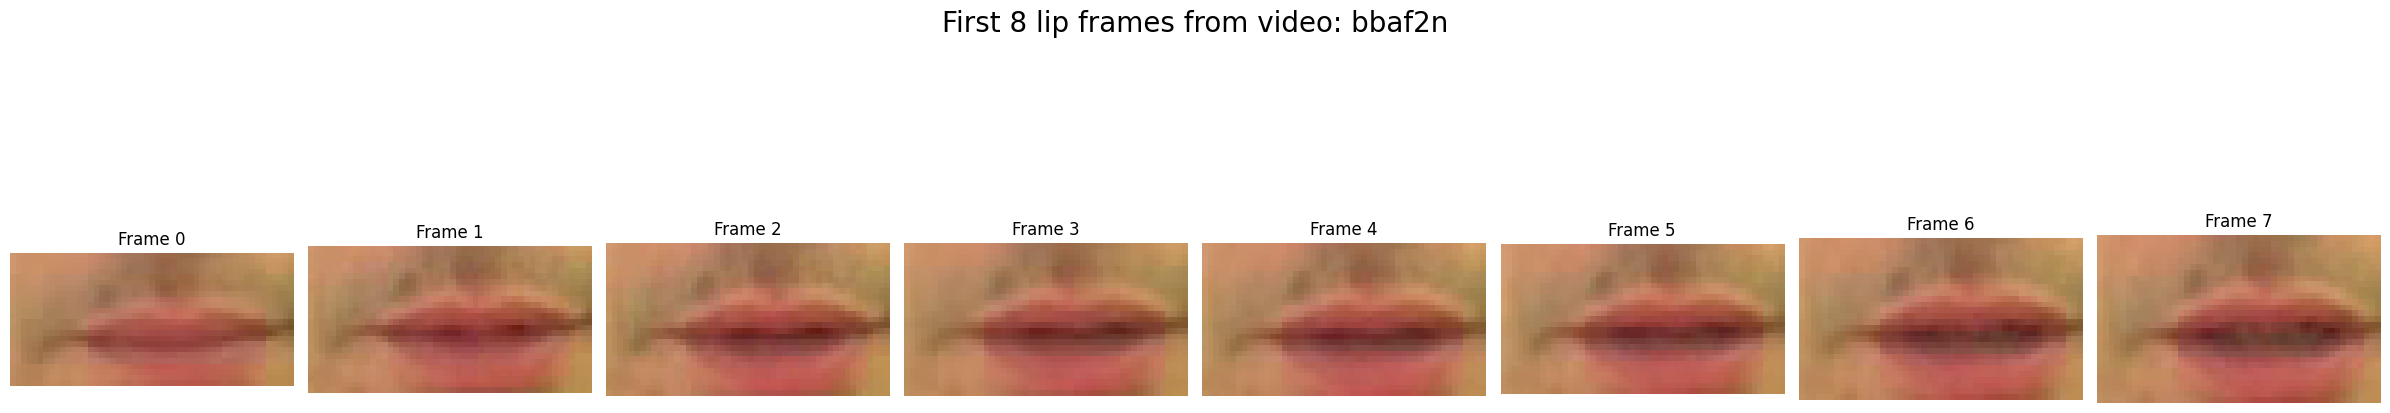

In [59]:
import matplotlib.pyplot as plt
import cv2
import os

# Show the first 8 lip frames from the first video folder in a large figure
base_output_dir = output_dir  # already set to processed_lips
video_folders = sorted([f for f in os.listdir(base_output_dir) if os.path.isdir(os.path.join(base_output_dir, f))])

if video_folders:
    folder_path = os.path.join(base_output_dir, video_folders[0])
    lip_images = sorted([f for f in os.listdir(folder_path) if f.endswith('.png')])
    num_to_show = min(8, len(lip_images))
    if num_to_show > 0:
        plt.figure(figsize=(24, 6))  # Larger figure
        for i in range(num_to_show):
            img_path = os.path.join(folder_path, lip_images[i])
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, num_to_show, i+1)
            plt.imshow(img_rgb)
            plt.title(f"Frame {i}")
            plt.axis('off')
        plt.suptitle(f"First {num_to_show} lip frames from video: {video_folders[0]}", fontsize=20)
        plt.tight_layout()
        plt.show()
    else:
        print("No lip images found in the first video folder.")
else:
    print("No video folders found in output directory.")

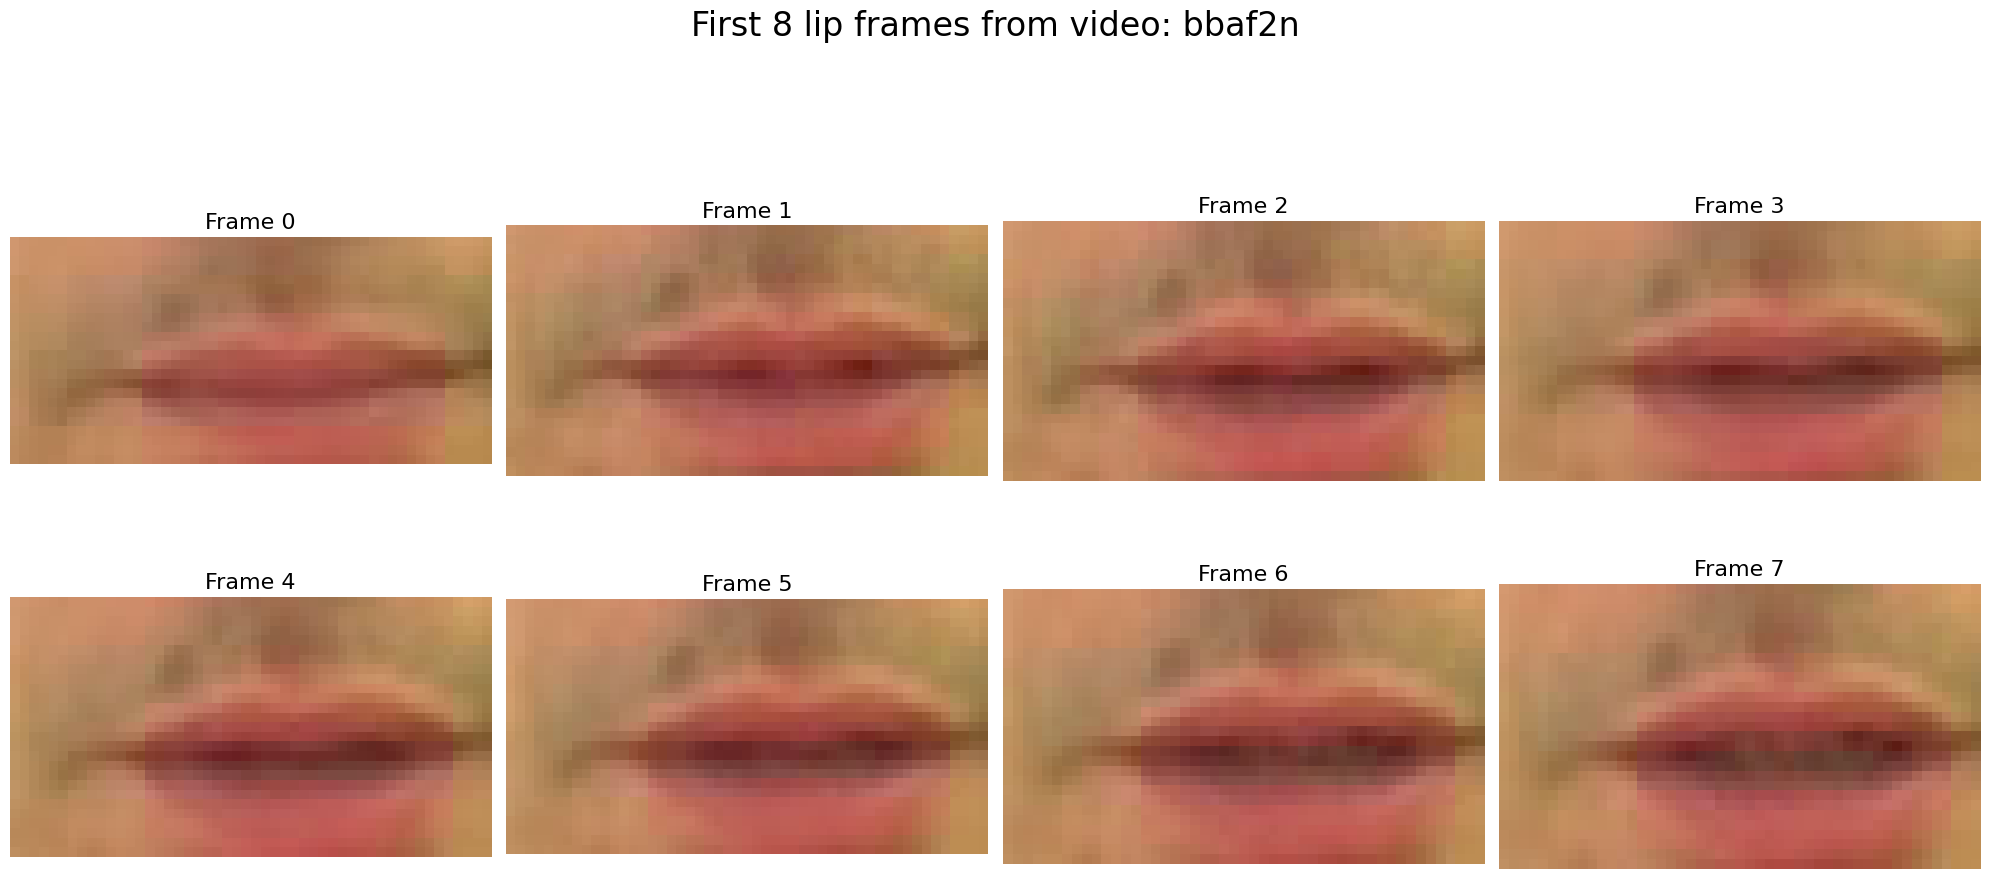

In [60]:
import matplotlib.pyplot as plt
import cv2
import os

# Show the first 8 lip frames from the first video folder in a larger grid
base_output_dir = output_dir  # already set to processed_lips
video_folders = sorted([f for f in os.listdir(base_output_dir) if os.path.isdir(os.path.join(base_output_dir, f))])

if video_folders:
    folder_path = os.path.join(base_output_dir, video_folders[0])
    lip_images = sorted([f for f in os.listdir(folder_path) if f.endswith('.png')])
    num_to_show = min(8, len(lip_images))
    if num_to_show > 0:
        plt.figure(figsize=(20, 10))  # Much larger figure
        for i in range(num_to_show):
            img_path = os.path.join(folder_path, lip_images[i])
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(2, 4, i+1)  # 2 rows, 4 columns
            plt.imshow(img_rgb)
            plt.title(f"Frame {i}", fontsize=16)
            plt.axis('off')
        plt.suptitle(f"First {num_to_show} lip frames from video: {video_folders[0]}", fontsize=24)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
    else:
        print("No lip images found in the first video folder.")
else:
    print("No video folders found in output directory.")

In [63]:
import dlib
import cv2
import numpy as np
from imutils import face_utils
import os
import glob

# Paths
video_dir = "/home/diya871/code/G-Gress/lip_reading/raw_data/videos/s1.mpg_vcd/s1"
predictor_path = "/home/diya871/code/G-Gress/lip_reading/lip_reading/shape_predictor_68_face_landmarks.dat"
output_dir = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips_margin20"
os.makedirs(output_dir, exist_ok=True)

# Load dlib models
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/home/diya871/code/G-Gress/lip_reading/lip_reading/shape_predictor_68_face_landmarks.dat/shape_predictor_68_face_landmarks.dat")

# Lip landmark indices
LIP_INDEXES = list(range(48, 68))

def extract_lip_region(frame, landmarks):
    lip_points = landmarks[LIP_INDEXES]
    x, y, w, h = cv2.boundingRect(np.array(lip_points))
    margin = 20  # Increased margin
    x = max(x - margin, 0)
    y = max(y - margin, 0)
    return frame[y:y+h+margin, x:x+w+margin]

# Get first 10 video files
video_files = sorted(glob.glob(os.path.join(video_dir, "*.mpg")))[:10]

for video_file in video_files:
    video_name = os.path.splitext(os.path.basename(video_file))[0]
    video_output_dir = os.path.join(output_dir, video_name)
    os.makedirs(video_output_dir, exist_ok=True)
    cap = cv2.VideoCapture(video_file)
    frame_num = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)
        if len(faces) > 0:
            shape = predictor(gray, faces[0])
            shape = face_utils.shape_to_np(shape)
            lip = extract_lip_region(frame, shape)
            lip_filename = f"frame{frame_num}_lip.png"
            lip_path = os.path.join(video_output_dir, lip_filename)
            cv2.imwrite(lip_path, lip)
        frame_num += 1
    cap.release()
    print(f"✅ Lip extraction complete for {video_name} (margin=20)")

✅ Lip extraction complete for bbaf2n (margin=20)
✅ Lip extraction complete for bbaf3s (margin=20)
✅ Lip extraction complete for bbaf4p (margin=20)
✅ Lip extraction complete for bbaf5a (margin=20)
✅ Lip extraction complete for bbal6n (margin=20)
✅ Lip extraction complete for bbal7s (margin=20)
✅ Lip extraction complete for bbal8p (margin=20)
✅ Lip extraction complete for bbal9a (margin=20)
✅ Lip extraction complete for bbas1s (margin=20)
✅ Lip extraction complete for bbas2p (margin=20)


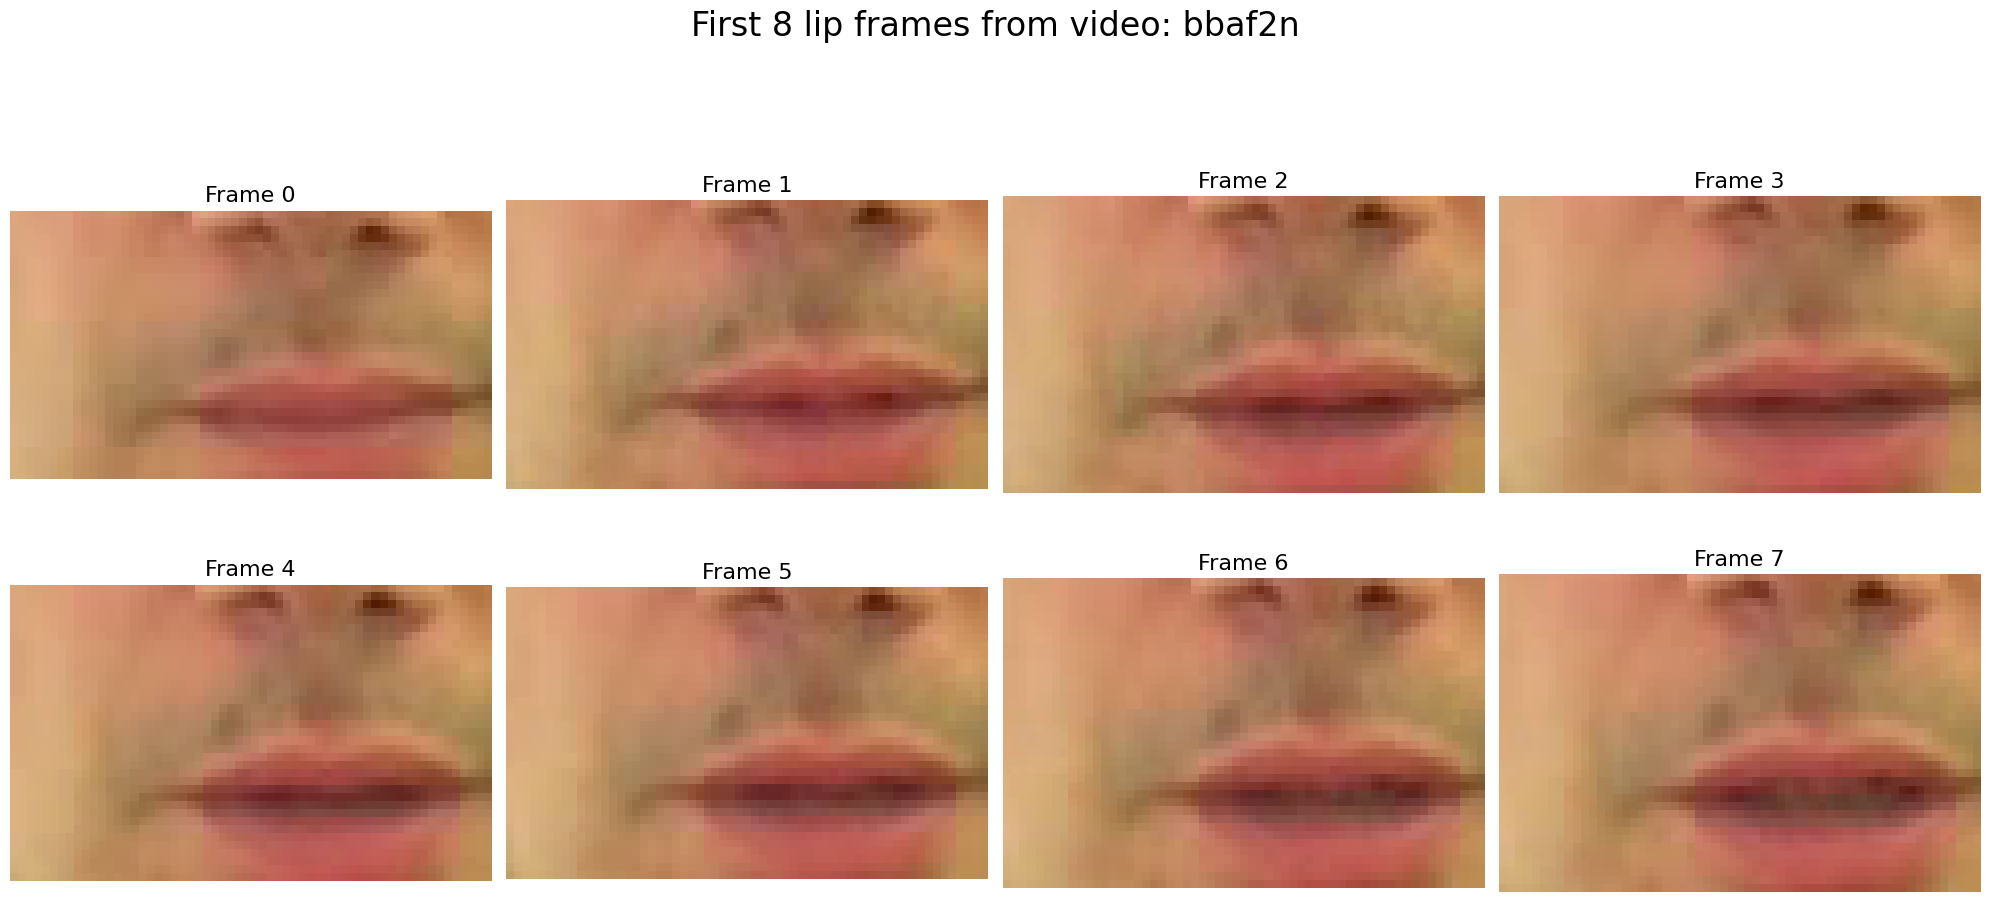

In [64]:
import matplotlib.pyplot as plt
import cv2
import os

# Visualize the first 8 lip frames from any one video in processed_lips_margin20
output_dir = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips_margin20"
video_folders = sorted([f for f in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, f))])

# Change the index below to visualize a different video (0 for first, 1 for second, etc.)
video_index = 0

if video_folders:
    folder_path = os.path.join(output_dir, video_folders[video_index])
    lip_images = sorted([f for f in os.listdir(folder_path) if f.endswith('.png')])
    num_to_show = min(8, len(lip_images))
    if num_to_show > 0:
        plt.figure(figsize=(20, 10))
        for i in range(num_to_show):
            img_path = os.path.join(folder_path, lip_images[i])
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(2, 4, i+1)
            plt.imshow(img_rgb)
            plt.title(f"Frame {i}", fontsize=16)
            plt.axis('off')
        plt.suptitle(f"First {num_to_show} lip frames from video: {video_folders[video_index]}", fontsize=24)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
    else:
        print("No lip images found in the selected video folder.")
else:
    print("No video folders found in output directory.")

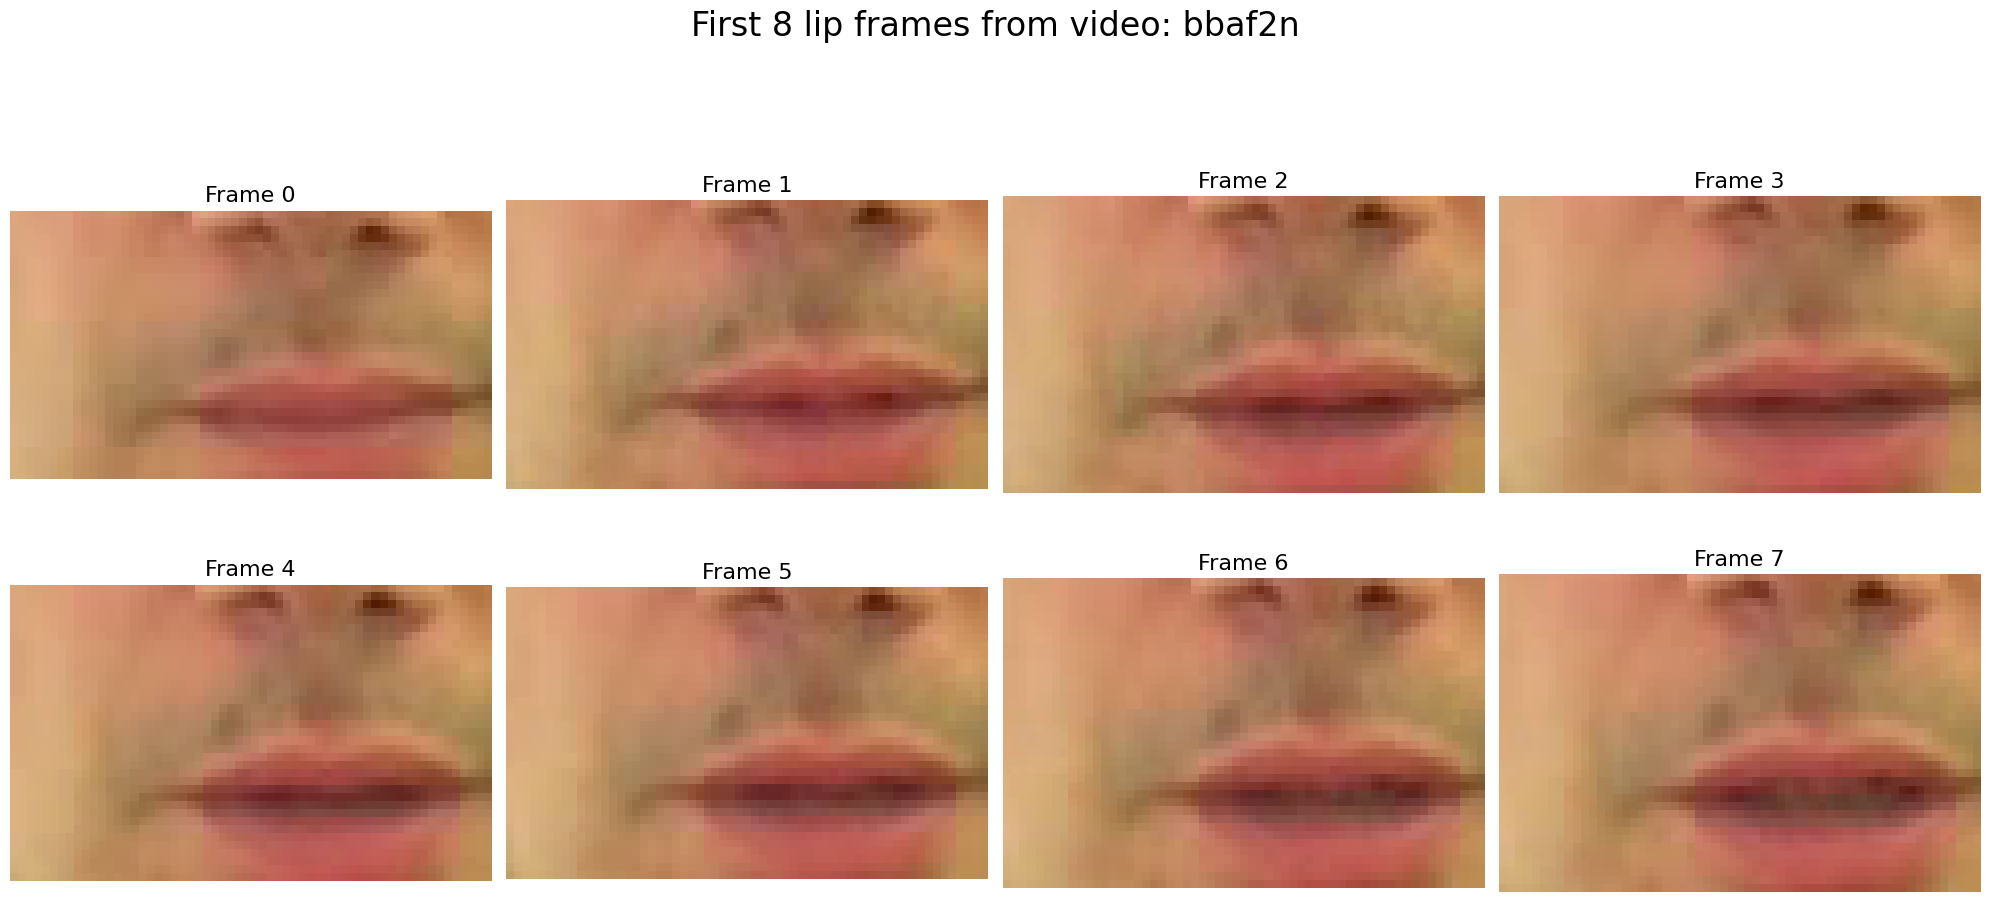

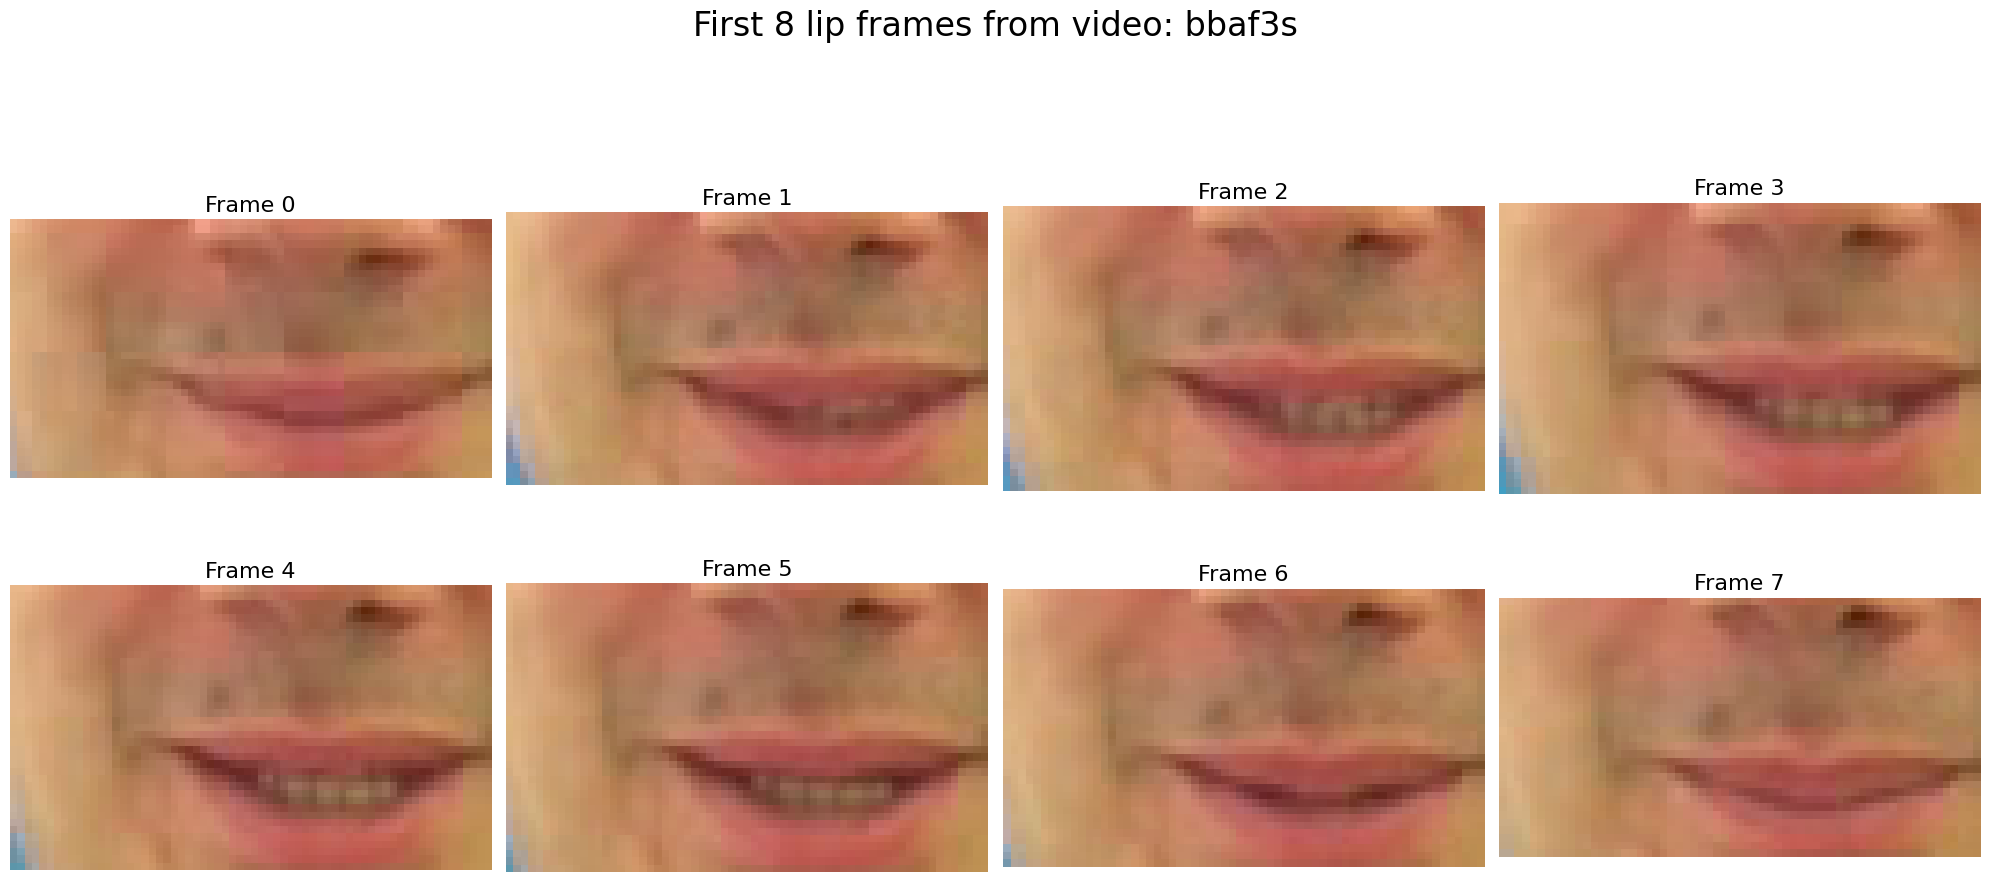

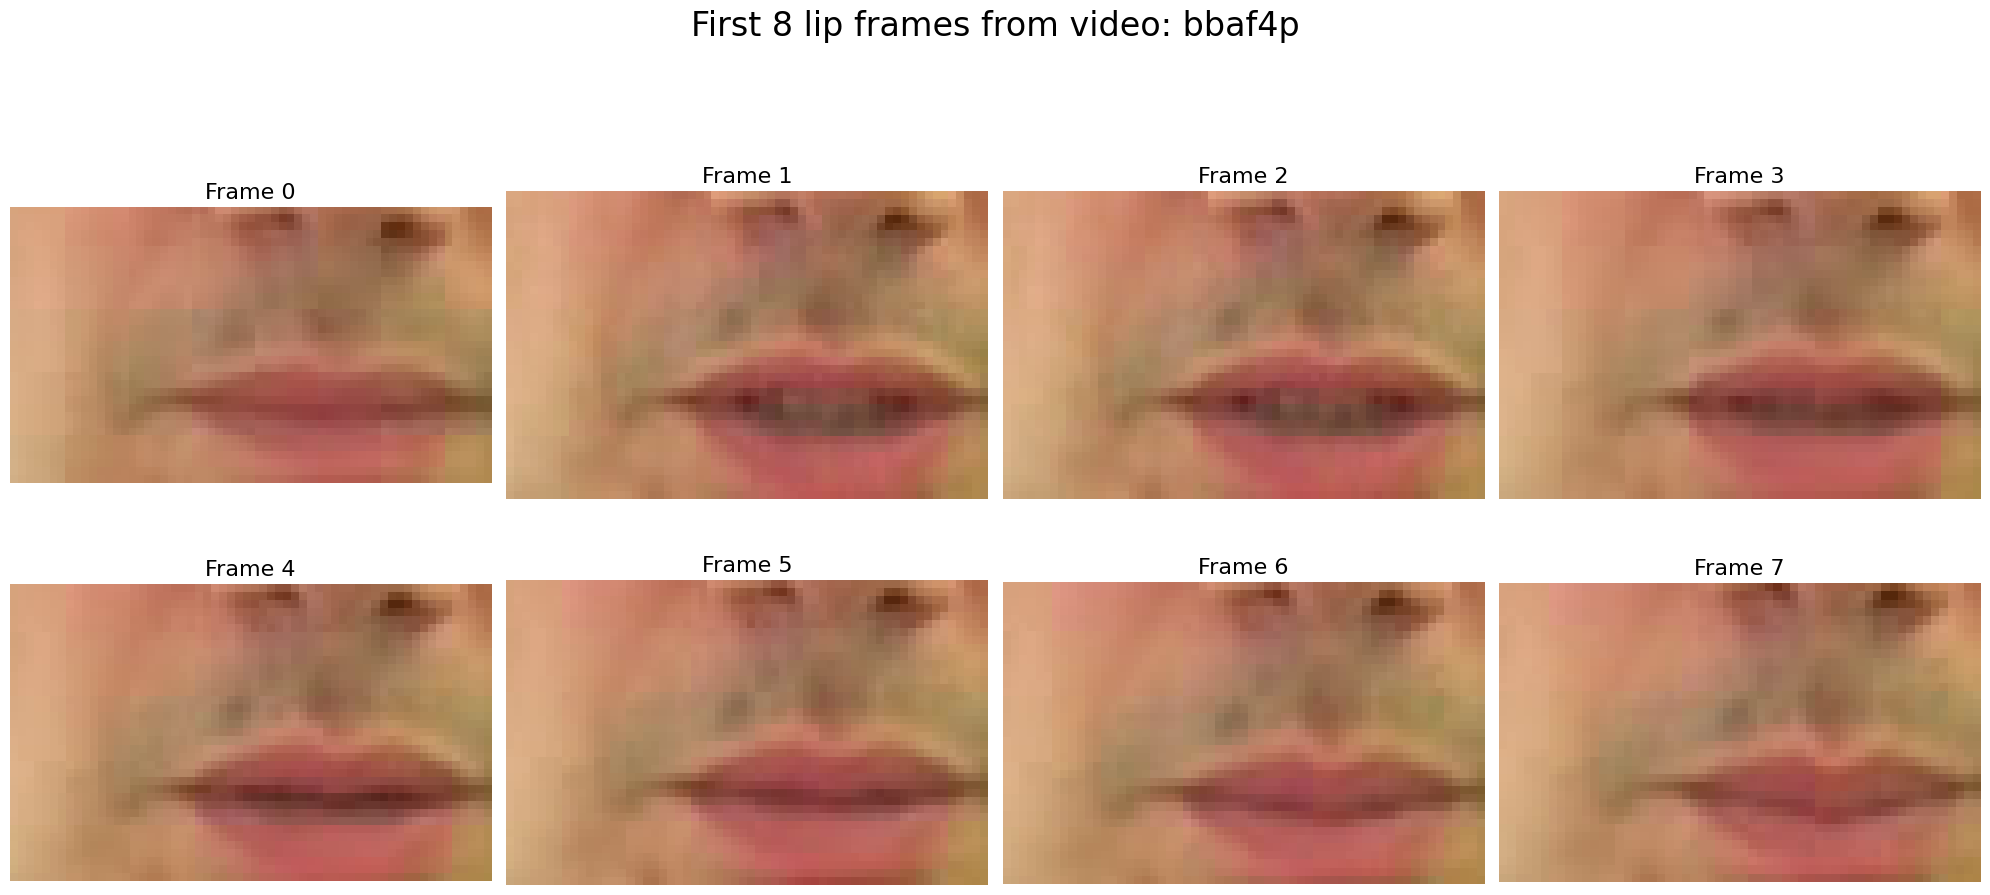

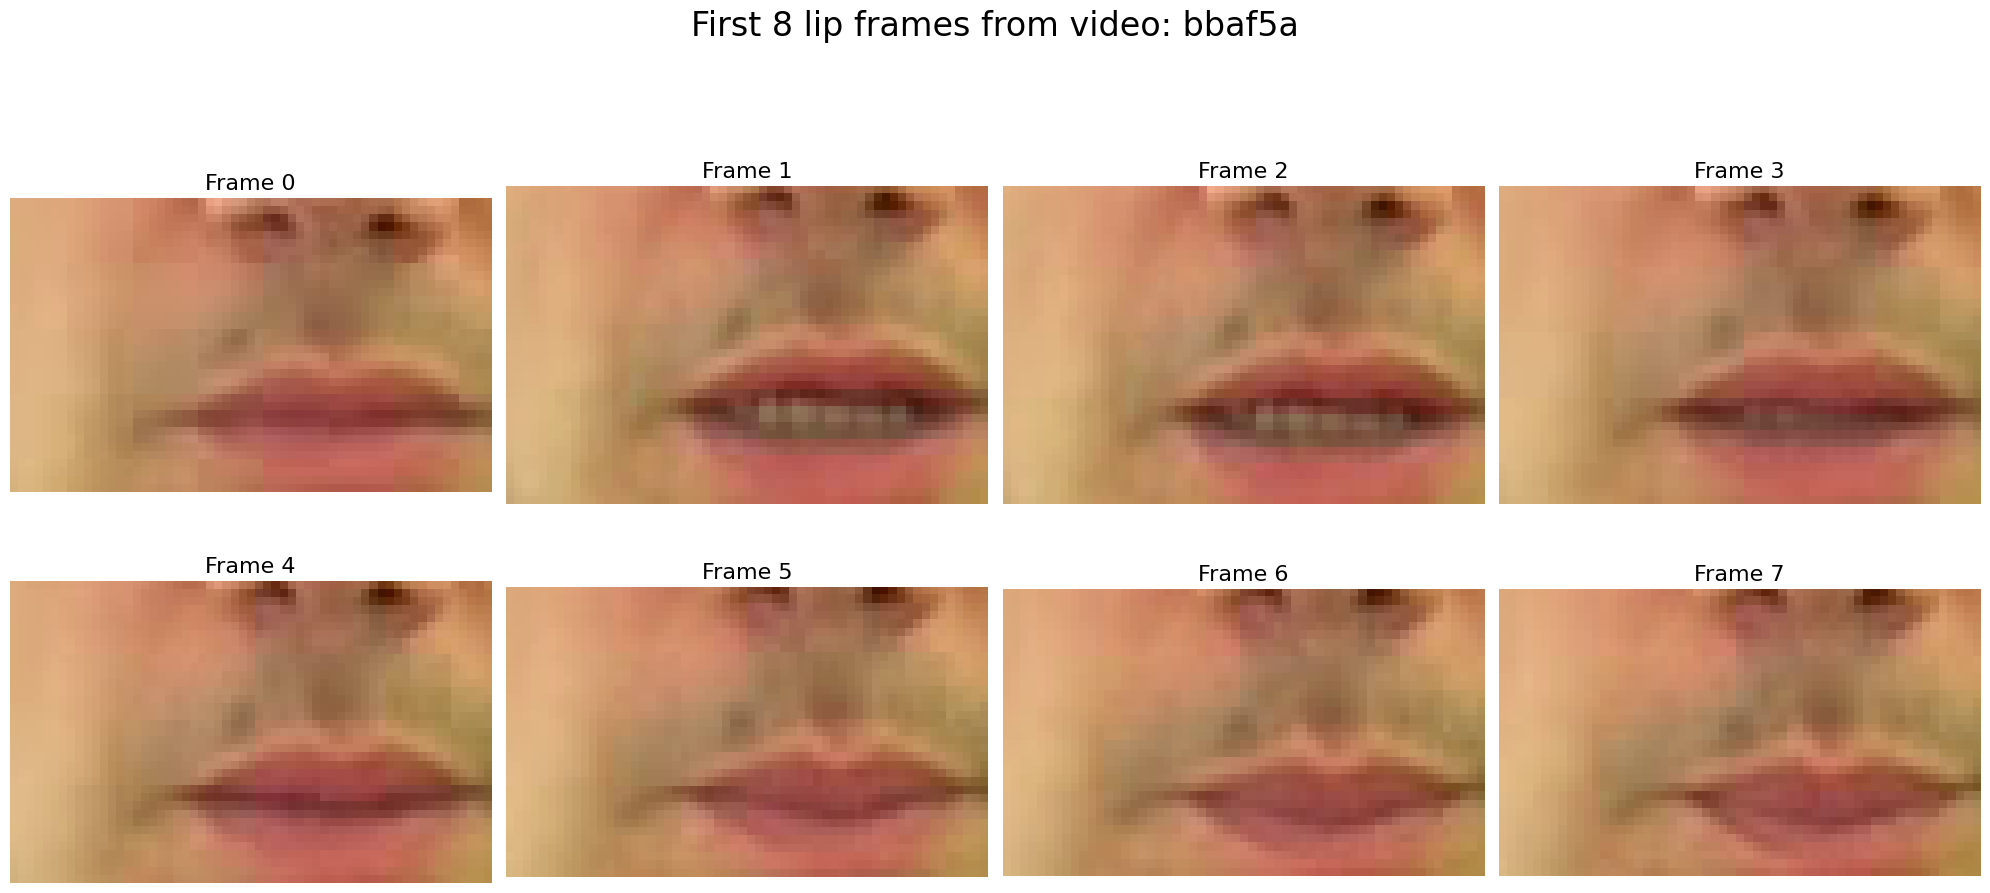

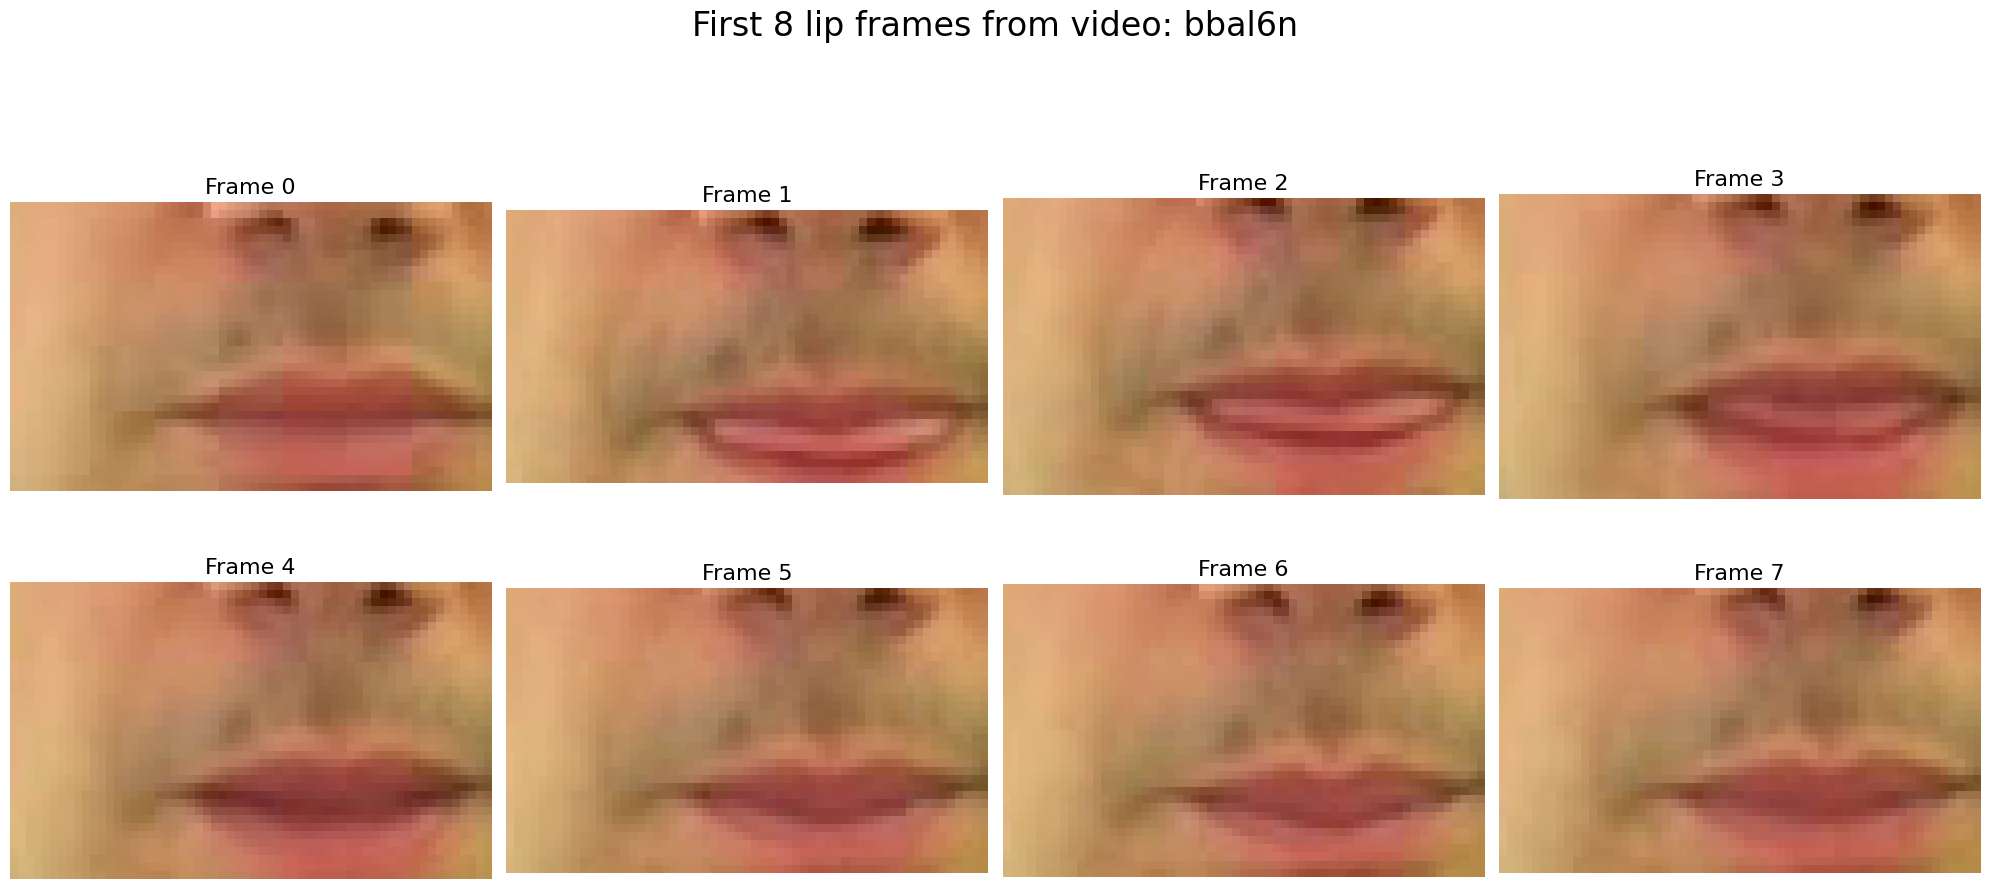

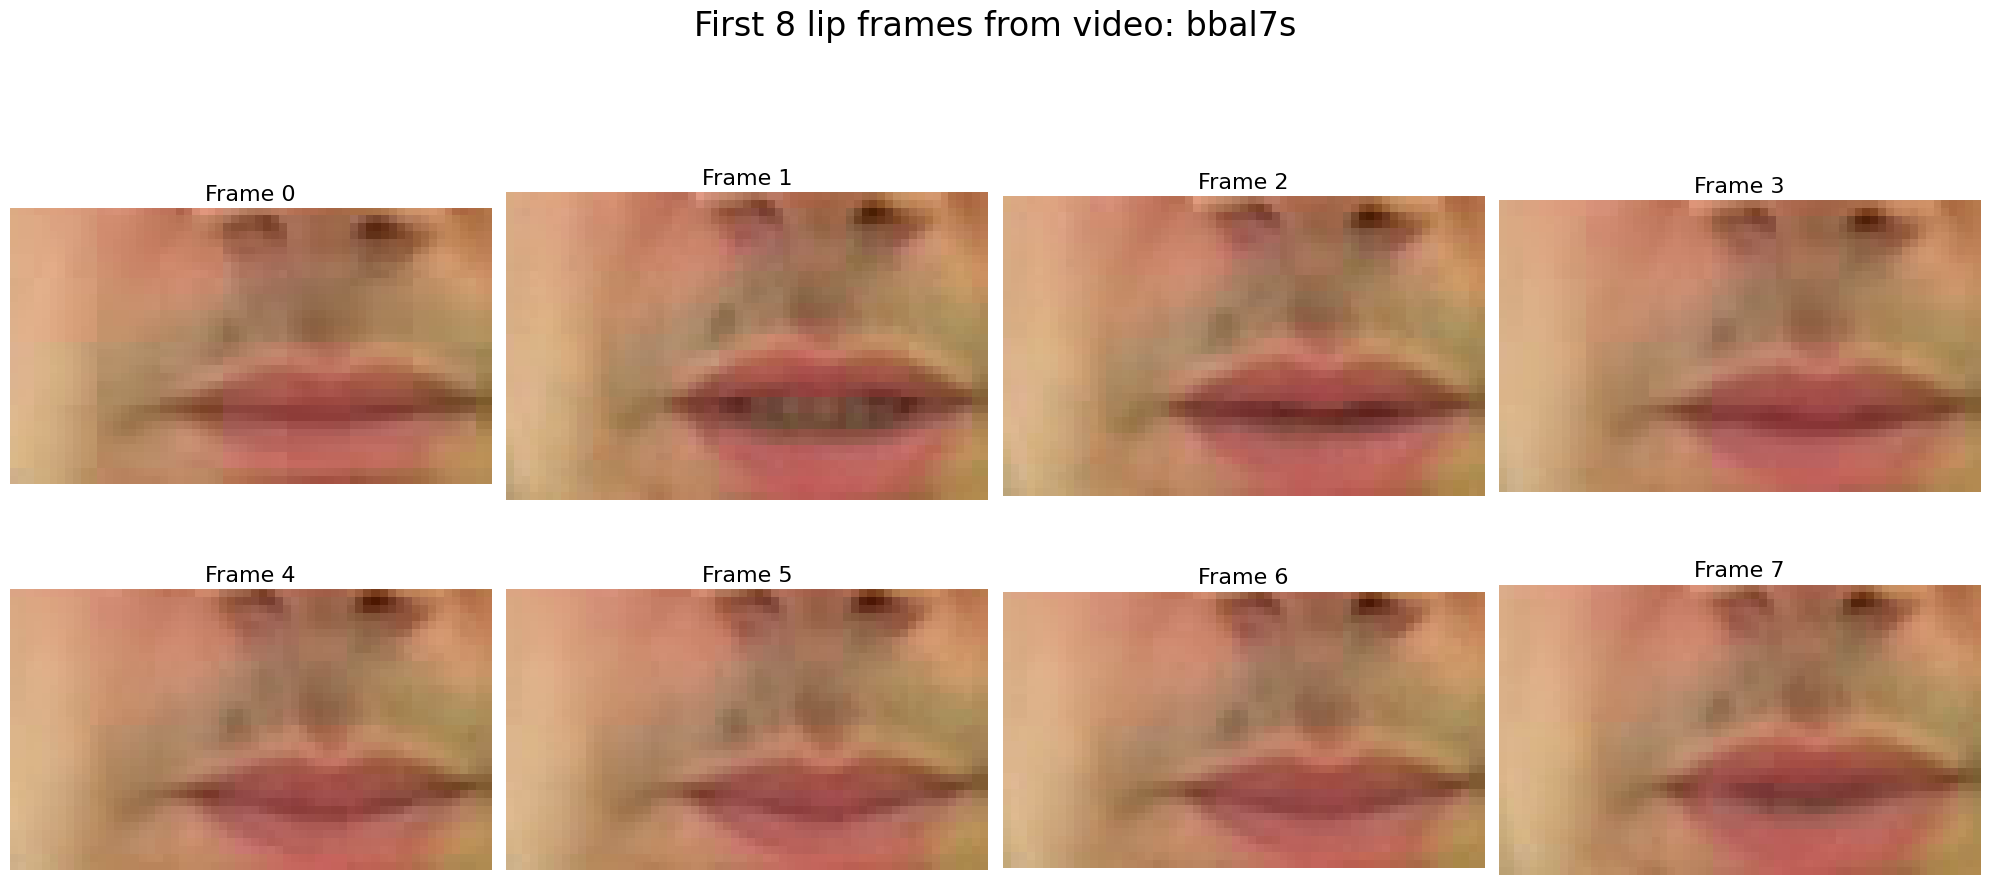

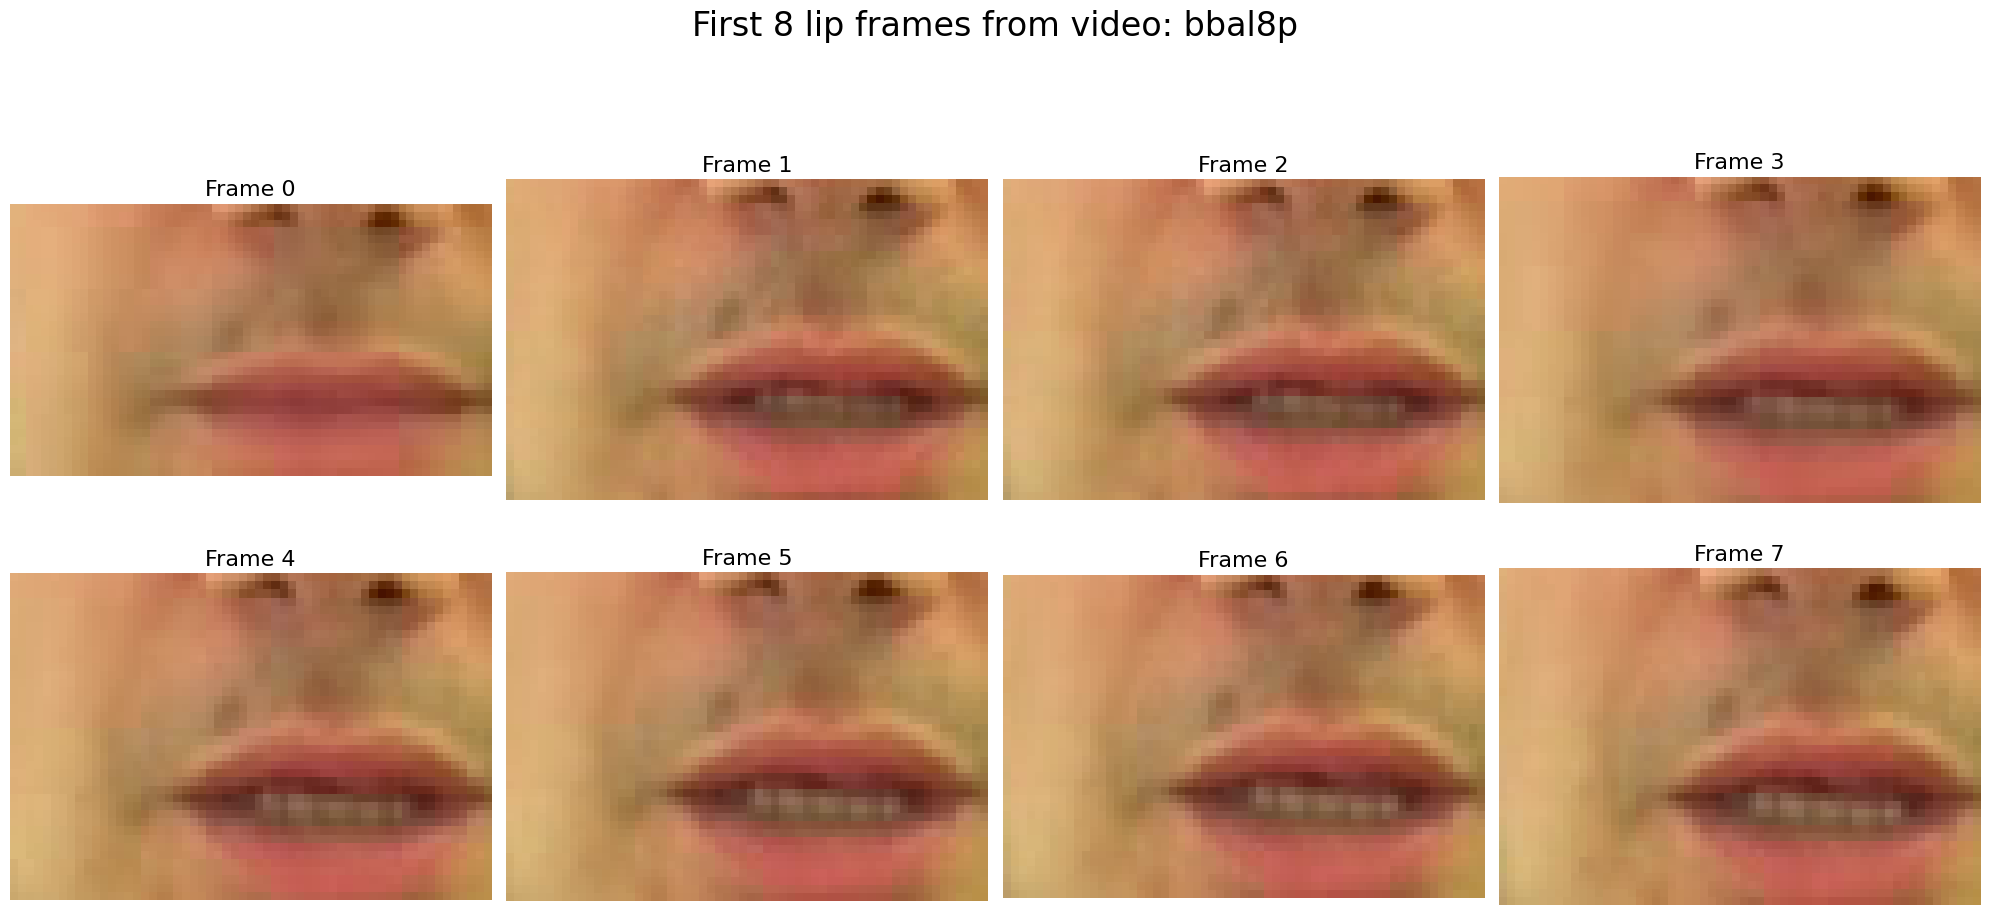

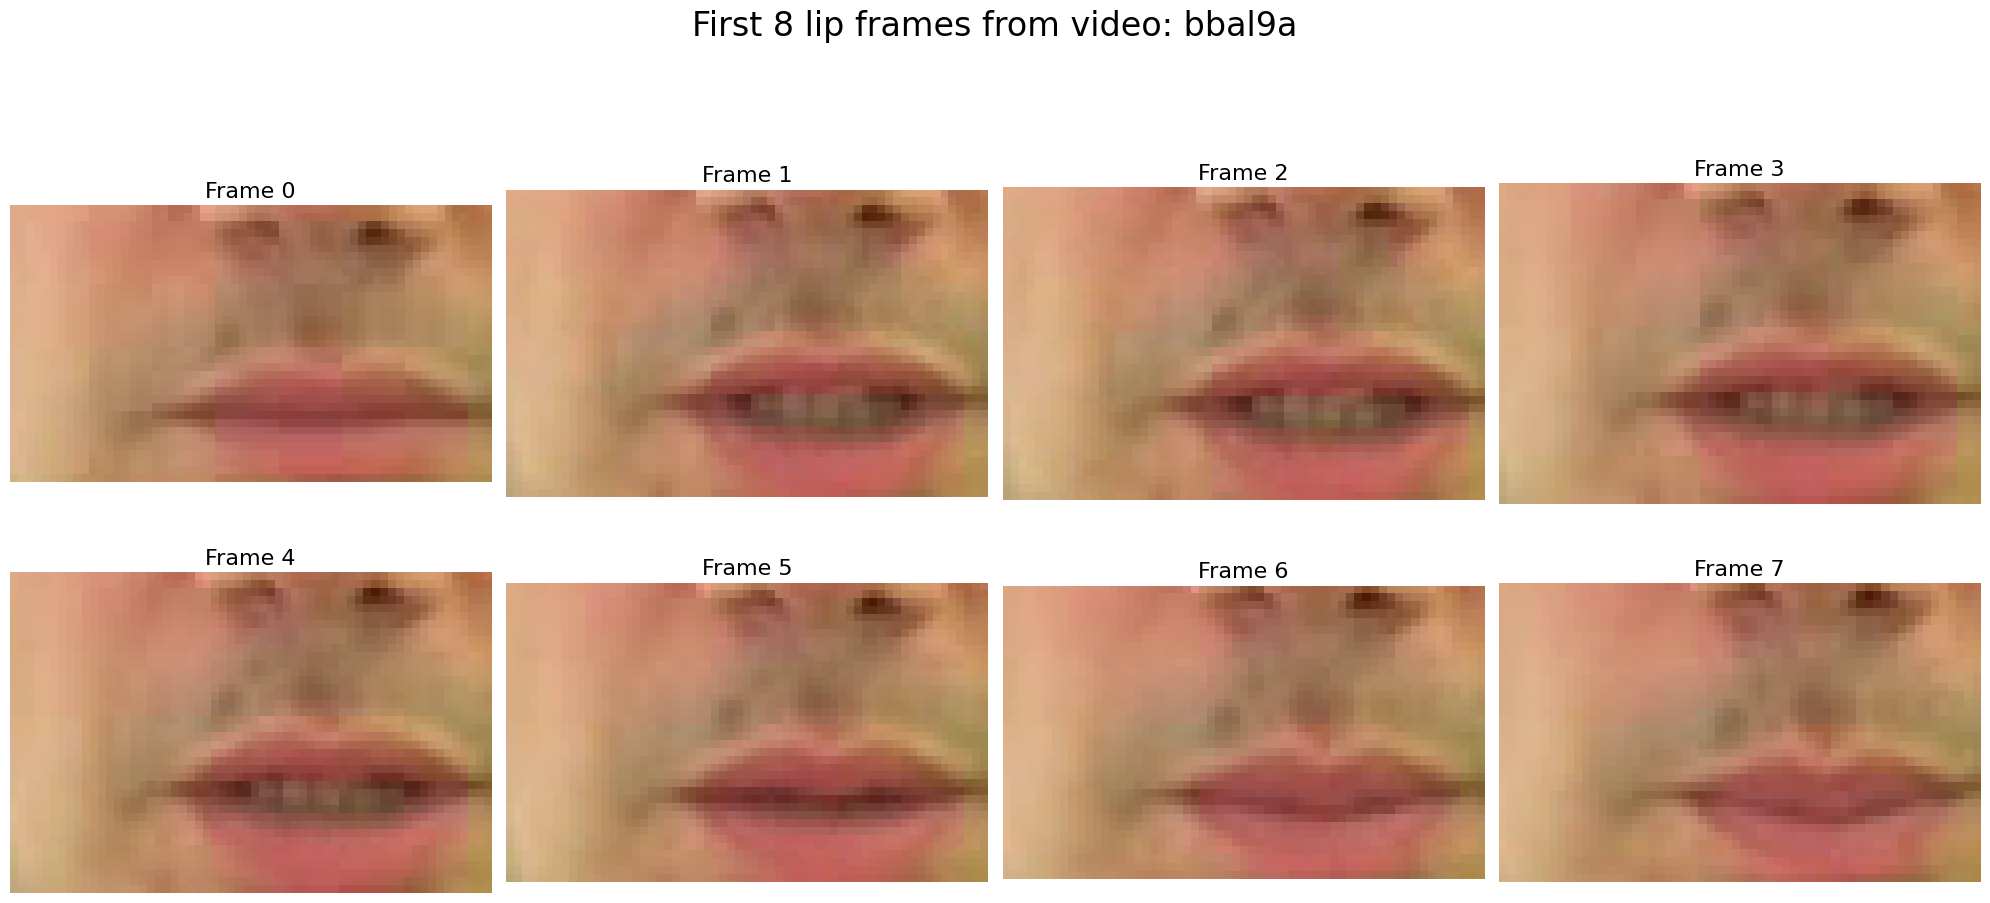

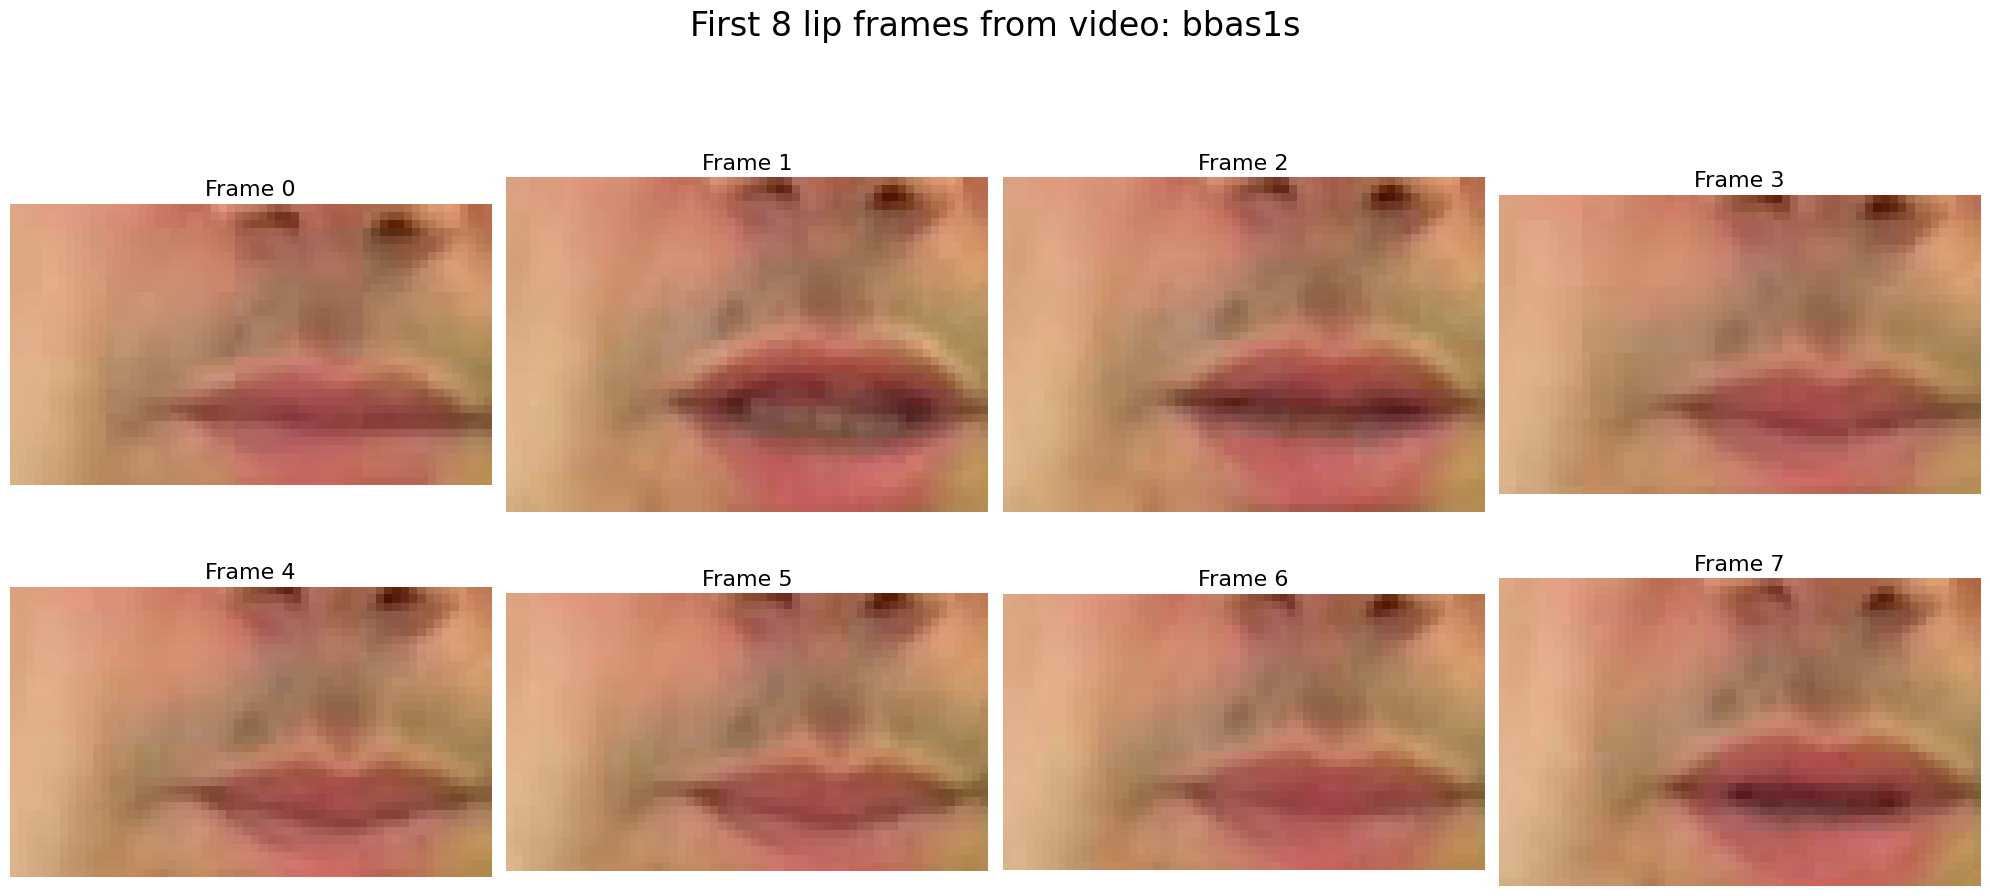

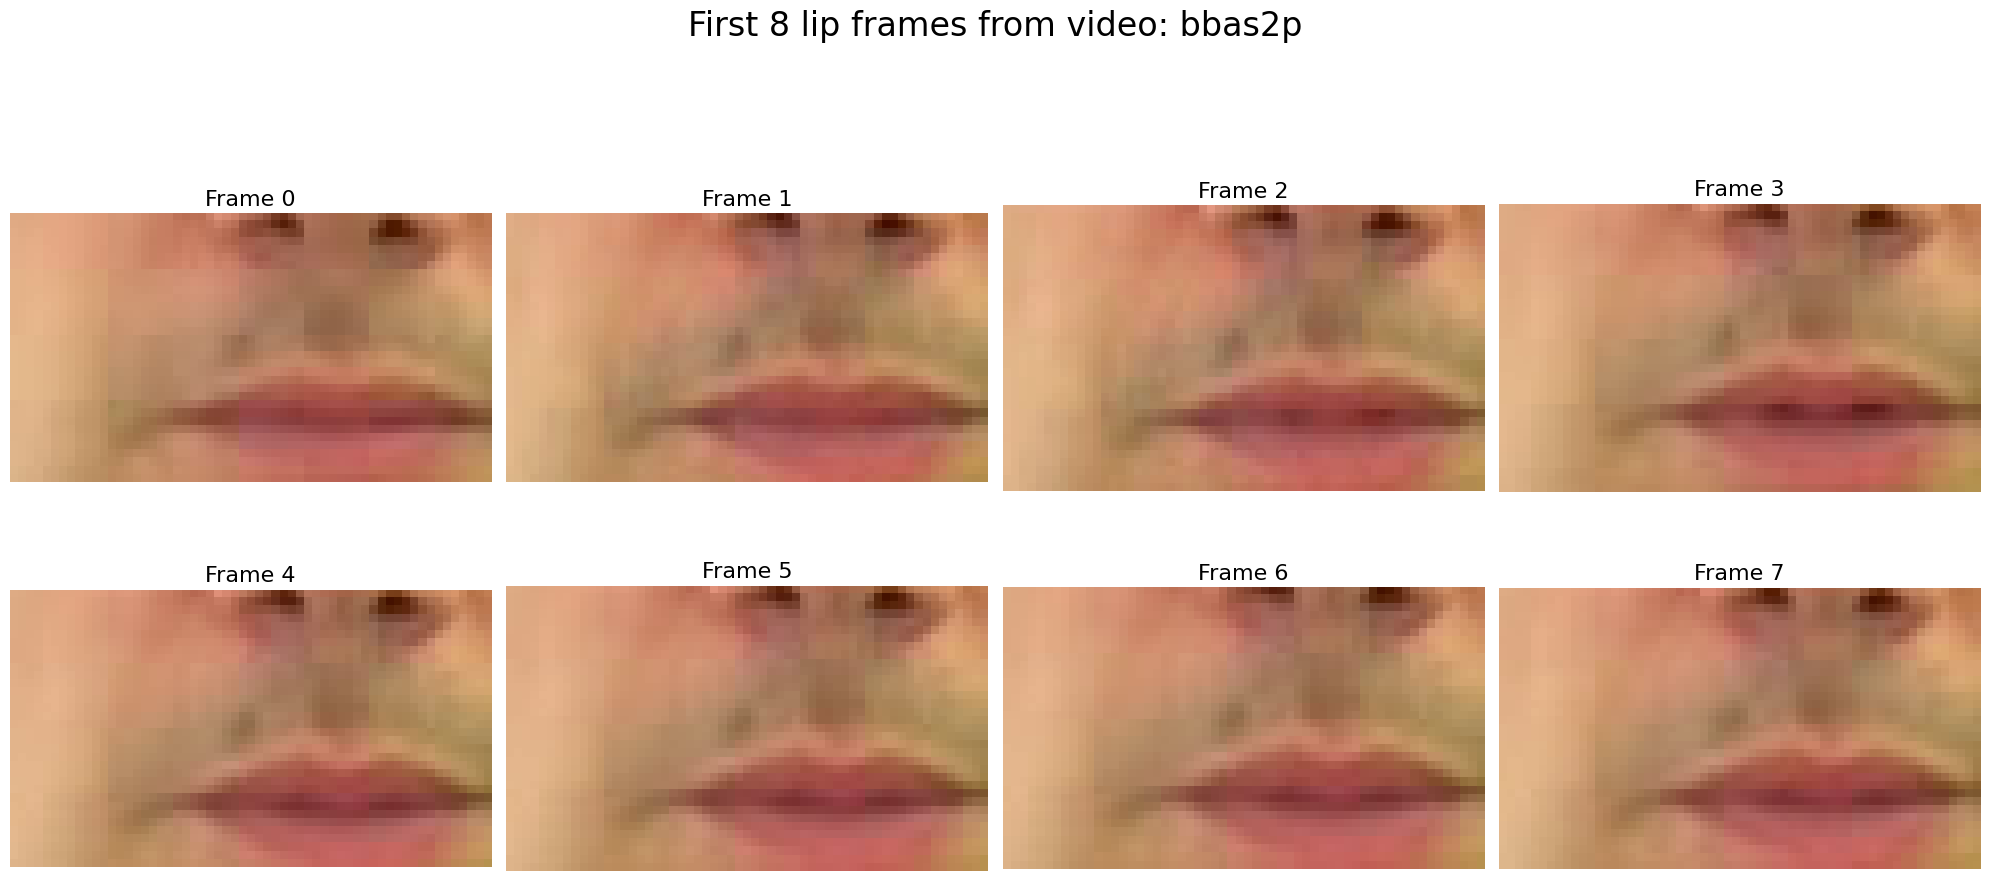

In [65]:
import matplotlib.pyplot as plt
import cv2
import os

# Visualize the first 8 lip frames from every video in processed_lips_margin20
output_dir = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips_margin20"
video_folders = sorted([f for f in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, f))])

for video_folder in video_folders:
    folder_path = os.path.join(output_dir, video_folder)
    lip_images = sorted([f for f in os.listdir(folder_path) if f.endswith('.png')])
    num_to_show = min(8, len(lip_images))
    if num_to_show == 0:
        continue
    plt.figure(figsize=(20, 10))
    for i in range(num_to_show):
        img_path = os.path.join(folder_path, lip_images[i])
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 4, i+1)
        plt.imshow(img_rgb)
        plt.title(f"Frame {i}", fontsize=16)
        plt.axis('off')
    plt.suptitle(f"First {num_to_show} lip frames from video: {video_folder}", fontsize=24)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [66]:
import cv2
import os

# Check the shape of the first extracted lip image from any one video in processed_lips_margin20
output_dir = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips_margin20"
video_folders = sorted([f for f in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, f))])

video_index = 0  # Change this to select a different video
if video_folders:
    folder_path = os.path.join(output_dir, video_folders[video_index])
    lip_images = sorted([f for f in os.listdir(folder_path) if f.endswith('.png')])
    if lip_images:
        img_path = os.path.join(folder_path, lip_images[0])
        img = cv2.imread(img_path)
        print("Input size (height, width, channels):", img.shape)
    else:
        print("No lip images found in the selected video folder.")
else:
    print("No video folders found in output directory.")

Input size (height, width, channels): (34, 61, 3)


In [70]:
for video_folder in video_folders:
    folder_path = os.path.join(output_dir, video_folder)
    lip_images = sorted([f for f in os.listdir(folder_path) if f.endswith('.png')])
    if lip_images:
        img_path = os.path.join(folder_path, lip_images[0])
        img = cv2.imread(img_path)
        print(f"{video_folder}: {img.shape}")
    else:
        print(f"{video_folder}: No lip images found.")


bbaf2n: (34, 61, 3)
bbaf3s: (35, 65, 3)
bbaf4p: (35, 61, 3)
bbaf5a: (36, 59, 3)
bbal6n: (36, 60, 3)
bbal7s: (35, 61, 3)
bbal8p: (35, 62, 3)
bbal9a: (35, 61, 3)
bbas1s: (35, 60, 3)
bbas2p: (33, 59, 3)


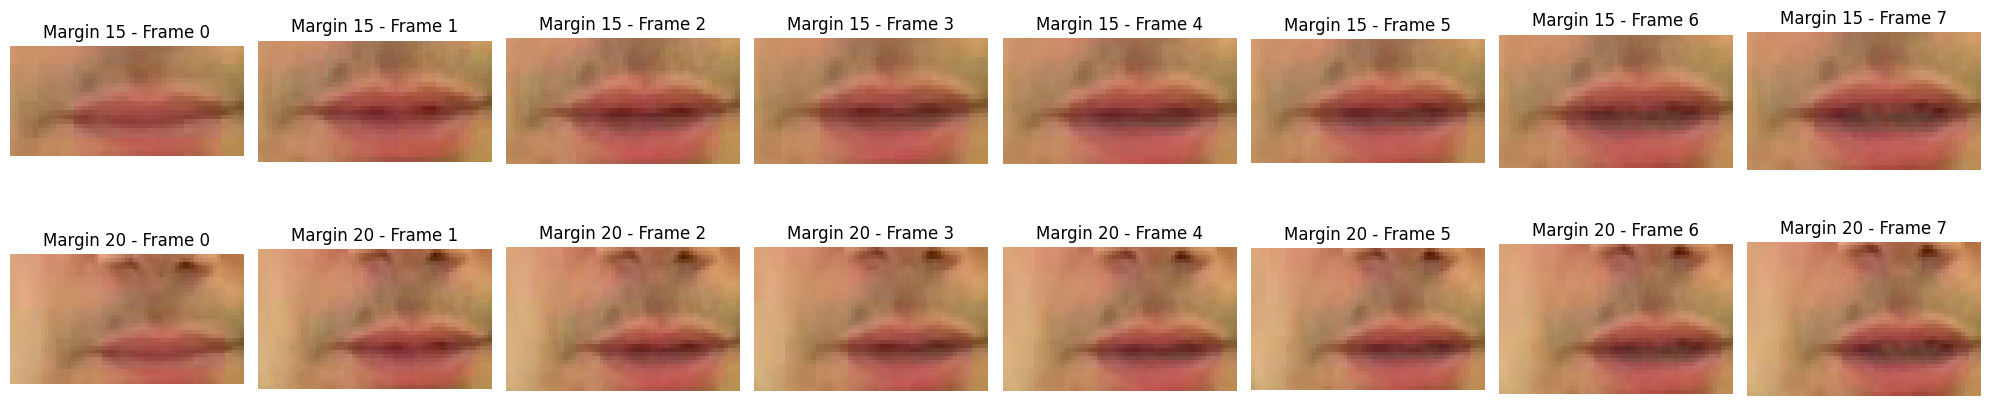

In [74]:
import matplotlib.pyplot as plt
import cv2
import os

def show_comparison(video_folder, margin15_dir, margin20_dir, num_to_show=8):
    folder15 = os.path.join(margin15_dir, video_folder)
    folder20 = os.path.join(margin20_dir, video_folder)
    imgs15 = sorted([f for f in os.listdir(folder15) if f.endswith('.png')])
    imgs20 = sorted([f for f in os.listdir(folder20) if f.endswith('.png')])
    n = min(num_to_show, len(imgs15), len(imgs20))
    plt.figure(figsize=(20, 5))
    for i in range(n):
        img15 = cv2.imread(os.path.join(folder15, imgs15[i]))
        img20 = cv2.imread(os.path.join(folder20, imgs20[i]))
        img15 = cv2.cvtColor(img15, cv2.COLOR_BGR2RGB)
        img20 = cv2.cvtColor(img20, cv2.COLOR_BGR2RGB)
        plt.subplot(2, n, i+1)
        plt.imshow(img15)
        plt.title(f"Margin 15 - Frame {i}")
        plt.axis('off')
        plt.subplot(2, n, n+i+1)
        plt.imshow(img20)
        plt.title(f"Margin 20 - Frame {i}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage:
margin15_dir = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips"
margin20_dir = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips_margin20"

if not os.path.isdir(margin15_dir):
    print(f"❌ Directory does not exist: {margin15_dir}")
else:
    video_folders = sorted([f for f in os.listdir(margin15_dir) if os.path.isdir(os.path.join(margin15_dir, f))])
    if video_folders:
        show_comparison(video_folders[0], margin15_dir, margin20_dir)
    else:
        print(f"No video folders found in {margin15_dir}")

In [76]:
import os

folder = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips/bbaf2n"
images = sorted([f for f in os.listdir(folder) if f.endswith('.png')])
if images:
	img_path = os.path.join(folder, images[0])
	img = cv2.imread(img_path)
	print(img.shape)
else:
	print("No image files found in the folder.")

(24, 51, 3)


In [77]:
import cv2
import os

folder = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips/bbaf2n"
images = sorted([f for f in os.listdir(folder) if f.endswith('.png')])
if images:
    img_path = os.path.join(folder, images[0])
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, (140, 46))  # (width, height)
    print("Original shape:", img.shape)
    print("Resized shape:", resized_img.shape)
else:
    print("No image files found in the folder.")

Original shape: (24, 51, 3)
Resized shape: (46, 140, 3)


Original shape: (24, 51, 3)
Resized shape: (46, 140, 3)


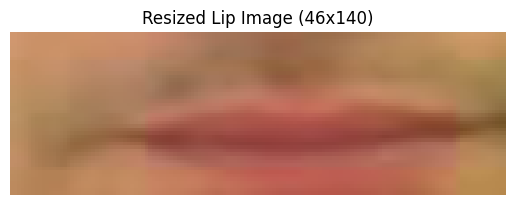

In [78]:
import cv2
import os
import matplotlib.pyplot as plt

folder = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips/bbaf2n"
images = sorted([f for f in os.listdir(folder) if f.endswith('.png')])
if images:
    img_path = os.path.join(folder, images[0])
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, (140, 46))  # (width, height)
    print("Original shape:", img.shape)
    print("Resized shape:", resized_img.shape)
    # Show the resized image
    img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title("Resized Lip Image (46x140)")
    plt.axis('off')
    plt.show()
else:
    print("No image files found in the folder.")

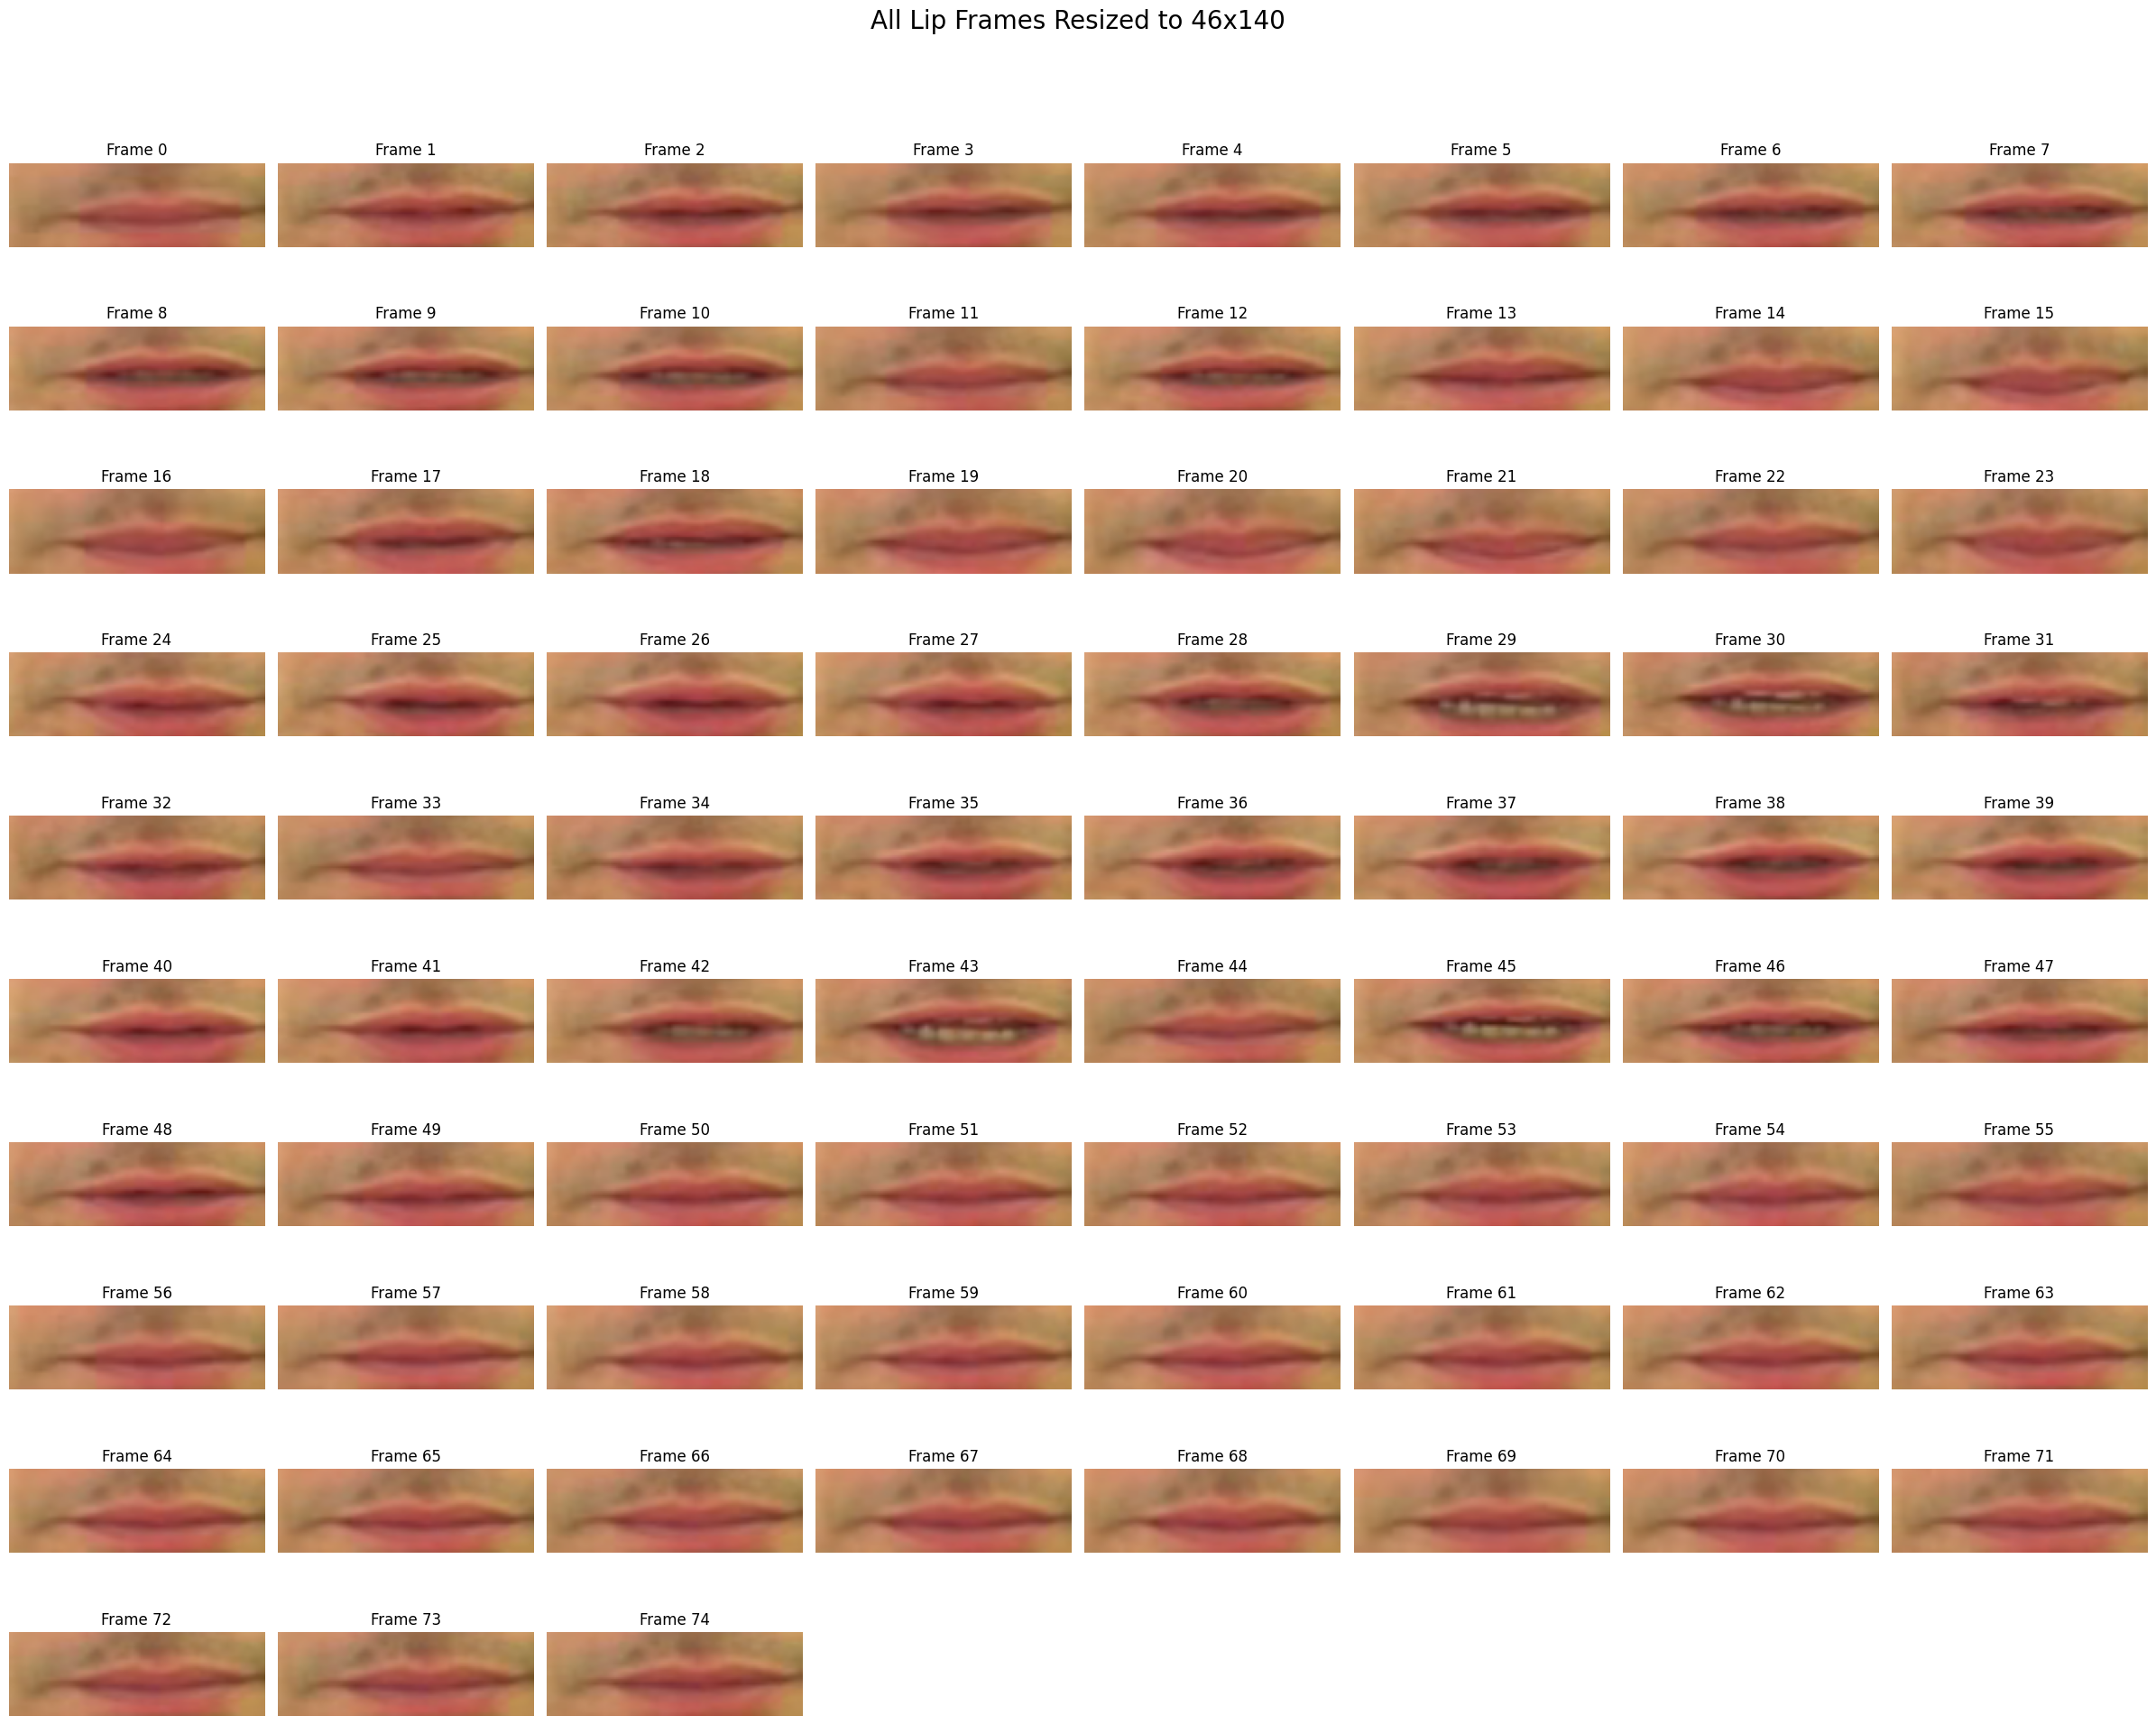

In [79]:
import cv2
import os
import matplotlib.pyplot as plt

folder = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips/bbaf2n"
images = sorted([f for f in os.listdir(folder) if f.endswith('.png')])
num_to_show = len(images)

if num_to_show > 0:
    plt.figure(figsize=(24, 2 * ((num_to_show + 7) // 8)))  # Adjust height for many frames
    for i in range(num_to_show):
        img_path = os.path.join(folder, images[i])
        img = cv2.imread(img_path)
        resized_img = cv2.resize(img, (140, 46))  # (width, height)
        img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
        plt.subplot((num_to_show + 7) // 8, 8, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"Frame {i}")
        plt.axis('off')
    plt.suptitle("All Lip Frames Resized to 46x140", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print("No image files found in the folder.")

In [80]:
import cv2
import os

folder = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips_margin20/bbaf2n"
images = sorted([f for f in os.listdir(folder) if f.endswith('.png')])
if images:
    img_path = os.path.join(folder, images[0])
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, (140, 46))  # (width, height)
    print("Original shape:", img.shape)
    print("Resized shape:", resized_img.shape)
else:
    print("No image files found in the folder.")

Original shape: (34, 61, 3)
Resized shape: (46, 140, 3)


Original shape: (34, 61, 3)
Resized shape: (46, 140, 3)


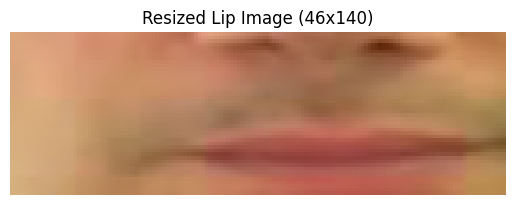

In [81]:
import cv2
import os
import matplotlib.pyplot as plt

folder = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips_margin20/bbaf2n"
images = sorted([f for f in os.listdir(folder) if f.endswith('.png')])
if images:
    img_path = os.path.join(folder, images[0])
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, (140, 46))  # (width, height)
    print("Original shape:", img.shape)
    print("Resized shape:", resized_img.shape)
    # Show the resized image
    img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title("Resized Lip Image (46x140)")
    plt.axis('off')
    plt.show()
else:
    print("No image files found in the folder.")

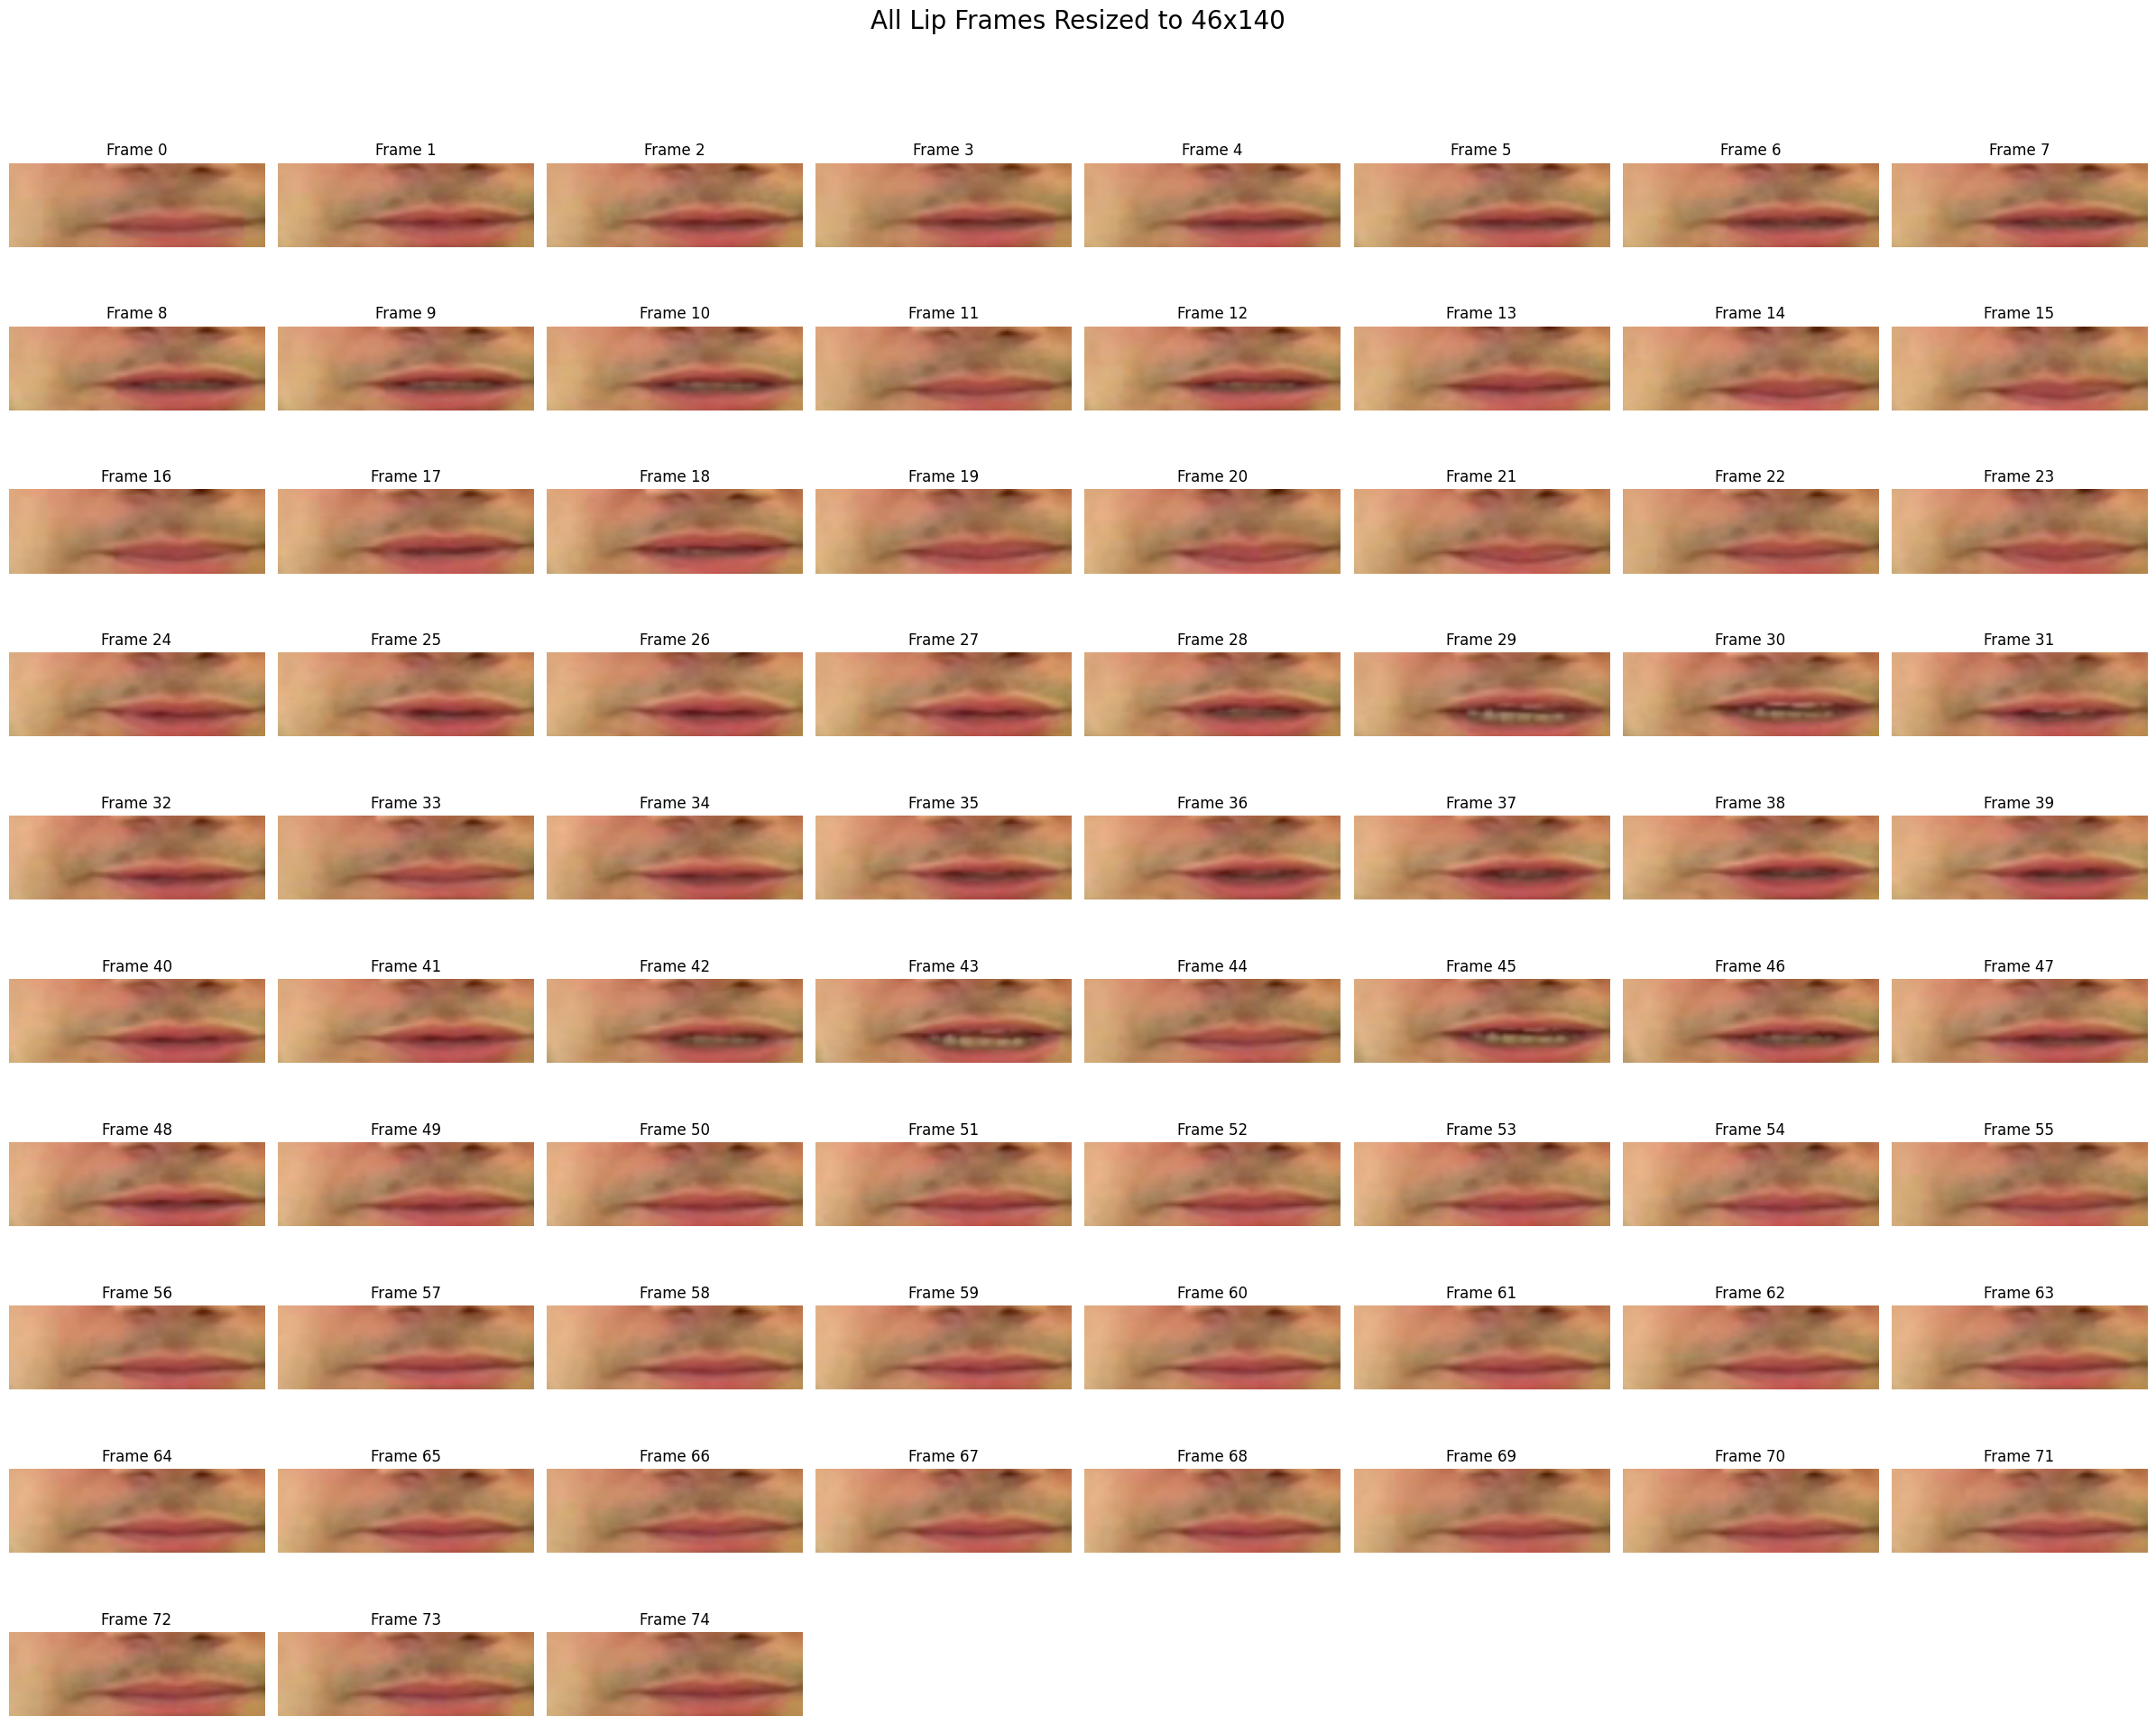

In [82]:
import cv2
import os
import matplotlib.pyplot as plt

folder = "/home/diya871/code/G-Gress/lip_reading/lip_reading/processed_lips_margin20/bbaf2n"
images = sorted([f for f in os.listdir(folder) if f.endswith('.png')])
num_to_show = len(images)

if num_to_show > 0:
    plt.figure(figsize=(24, 2 * ((num_to_show + 7) // 8)))  # Adjust height for many frames
    for i in range(num_to_show):
        img_path = os.path.join(folder, images[i])
        img = cv2.imread(img_path)
        resized_img = cv2.resize(img, (140, 46))  # (width, height)
        img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
        plt.subplot((num_to_show + 7) // 8, 8, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"Frame {i}")
        plt.axis('off')
    plt.suptitle("All Lip Frames Resized to 46x140", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print("No image files found in the folder.")